<a href="https://colab.research.google.com/github/ahkhaniki/spark-machine-learning/blob/main/Spark_Machine_Learning_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning with Apache Spark**

---
- Course: Big Data
- Topic: Uber Trip Data Analysis for Monitoring with Spark Streaming and Kafka
- Type: Unsupervised Learning / Clustering
- Author: Amir Hussein Khaniki
- URL: https://github.com/ahkhaniki/spark-machine-learning

---


#**Introduction**


Machine learning is a subset of artificial intelligence (AI), which provides systems that automatically recognize and train complex patterns in data and can therefore make intelligent decisions based on the data. Machine learning can be supervised or unsupervised. In unsupervised machine learning algorithms, the dataset contains no labels.

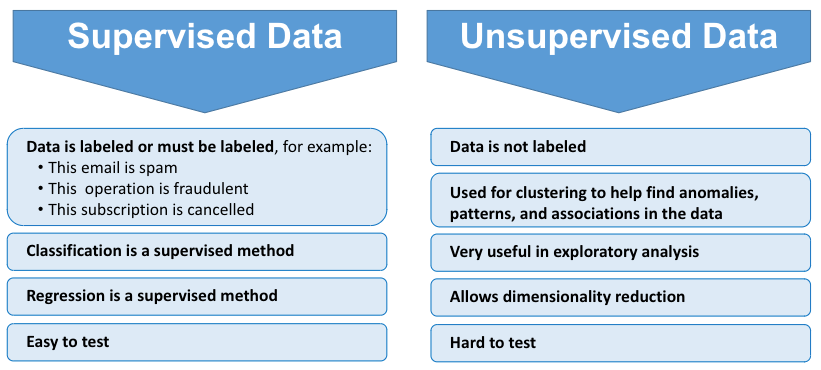

Unsupervised learning means we have a dataset that is completely unlabeled. We don’t know if there are any patterns hidden in the data, so we leave it to the algorithm to find anything it can. Specifically, the goal of unsupervised learning is to discover hidden patterns in any unlabeled data. One of the approaches to unsupervised learning is clustering. 


Clustering is an unsupervised learning technique that helps to identify patterns in data and is useful for exploratory data analysis, customer segmentation, anomaly detection, pattern recognition, image segmentation, search result analysis, social media analysis, and etc. It gathers data points into small clusters by analyzing their similarities and differences. Although this sounds simple, this approach can play a significant role.

If we consider customer segmentation as an example, it helps the organization identify buying patterns, brand loyalty, and spending ranges of customers to restock their shops accordingly. Likewise, clustering can have a significant impact on the decisions taken by an organization to improve its processes.

There are different types of clustering algorithms that handle all kinds of unique data:
* Density-based
* Distribution-based
* Centroid-based
* Hierarchical-based
* Fuzzy-based 

MLLib is Spark’s machine learning library that helps make functional machine learning models scalable and manageable. In other words, it designed for simplicity, scalability, and easy integration with other tools.

Spark MLLib consists of in-built tools such as:

* Machine Learning Algorithms: Common learning algorithms include logistic regression models, regression, decision trees, random forest algorithms, and many other ensemble methods.
* Featurization: Feature extraction, feature scaling, feature selection, and dimensionality reduction. 
* Pipelines: Tools for constructing, evaluating, and building machine learning pipelines.
* Persistence: Saving and loading algorithms, models, and pipelines.

While building a machine learning model, data scientists must perform many tasks, including data cleaning, feature engineering, making inferences from data, building machine learning pipelines, saving models, and finally deploying it. Spark MLlib library provides multiple features, making it a go-to choice for data scientists across top tech companies.

In pythonic, PySpark for machine learning is fast and uses multiple machines for large-scale data processing. It runs on distributed computing, such as YARN, Mesos, and Standalone clusters.

Right now, we are going to learn how to use Apache Spark MLlib to create a machine learning application. It will do predictive analysis on our dataset. From Spark's built-in machine learning libraries, we use cluster binders by PySpark ML.

##**Problem Statement**
Based on our dataset that includes Uber trip data, we need to discover the clusters of Uber data based on the longitude and latitude, then report clustering analysis by date/time.



#**Prerequisites**
Before processing the data, we must do some preparations and prerequisites.

Therefore, we install following dependencies:


1. Java 8
2. Apache Spark with hadoop
3. FindSpark (used to locate the spark in the system)
4. PySpark (used as an interface for Apache Spark in Python)


Since, several system environment variables need to be defined for the programs to work correctly, we use the `os` library.

Python OS module provides the facility to establish the interaction between the user and the operating system. It offers many useful OS functions that are used to perform OS-based tasks and get related information about operating system. The Python OS module lets us work with the files and directories.

In [1]:
import os

##**Java (JDK)**

In [2]:
# install java, it is not needed if installed
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

Now, we need to define `JAVA_HOME` variable for Java Virtual Machine (JVM).

In [3]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

##**PySpark**
Since Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java. As well as, we can install and set up the Spark environment on Google Colab via PySpark by manual method (using download) or automated method (using pip).

PySpark is a Python Spark framework for executing Python programs employing Apache Spark capabilities. PySpark is widely used in the Data Science and Machine Learning industry since many popular data science libraries are written in Python, such as NumPy and TensorFlow. It's also popular since it can handle enormous datasets quickly. The next step of this PySpark pipeline project is to read the streaming data from the Kafka topic and perform some operations on it using PySpark. Once the data has been processed, it is streamed into the output Kafka topic.


###Method 1
Installing and configuring Spark manually.

In [ ]:
# download and install spark
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
# unzip the spark file to the current folder
!tar -xvf spark-3.3.2-bin-hadoop3.tgz
# rename for user-friendly and better readability
!mv spark-3.3.2-bin-hadoop3 spark

In [ ]:
!ls

In [ ]:
! du -sh

Now, we need to set following environment variable for Spark.

In [ ]:
# set spark path to system path environment
os.environ["SPARK_HOME"] = "/content/spark"

###Method 2
Installing and configuring Spark using pipe and PySpark library.

In [4]:
# install libraries related to Spark
!pip install -q findspark
!pip install -q pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


##**Spark Streaming**
Spark Streaming is an extension of the core Spark API that allows data engineers and data scientists to process real-time data from various sources including (but not limited to) Kafka, Flume, and Amazon Kinesis. This processed data can be pushed out to file systems, databases, and live dashboards.

Apache Spark Streaming is a scalable, high-throughput, fault-tolerant streaming processing system that supports both batch and streaming workloads. It is an extension of the core Spark API to process real-time data from sources like Kafka, Flume, and Amazon Kinesis to name a few. This processed data can be pushed to other systems like databases, Kafka, live dashboards etc.



In [5]:
!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-8-assembly_2.11/2.4.8/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar"

--2023-05-16 11:11:42--  https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-8-assembly_2.11/2.4.8/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12002039 (11M) [application/java-archive]
Saving to: ‘spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar’

spark-streaming-kaf 100%[===================>]  11.45M  --.-KB/s    in 0.05s   

2023-05-16 11:11:42 (211 MB/s) - ‘spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar’ saved [12002039/12002039]



In [6]:
# set spark streaming path to system path environment
#os.environ["PYSPARK_SUBMIT_ARGS"] = "--jars /content/spark-streaming-kafka-0-8-assembly_2.11-2.4.8.jar pyspark-shell"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages org.apache.spark:spark-streaming-kafka-0-10_2.12:3.2.0,org.apache.spark:spark-sql-kafka-0-10_2.12:3.2.0 pyspark-shell'


##**Kafka**


Apache Kafka is a pub-sub (publish-subscribe) messaging service and a powerful queue that can manage a large amount of data and allows you to send messages from one terminal to another. Kafka may be used to accept messages both offline and online. To avoid data loss, Kafka messages are stored on a disc and replicated throughout the cluster. The Kafka messaging system is based on the ZooKeeper synchronization service. For real-time streaming data processing, it works well with Apache Storm and Spark. This data engineering project entails publishing the real-time streaming data into Kafka using the PublishKafka processor. Once the data is stored in Kafka topic, it needs to be streamed into PySpark for further processing.

Apache Kafka is a publish-subscribe messaging system originally written at LinkedIn.
A Kafka cluster is a highly scalable and fault-tolerant system and it also has a much higher throughput compared to other message brokers such as ActiveMQ and RabbitMQ.

Apache Kafka and Apache Spark are both reliable and robust tools used by many companies to daily process incredible amounts of data, making them one of the strongest pairs in the stream processing task.

In [7]:
# download and install kafka
!wget -q https://archive.apache.org/dist/kafka/3.4.0/kafka_2.13-3.4.0.tgz
# unzip the kafka file to the current folder
!tar -xvf kafka_2.13-3.4.0.tgz
# rename for user-friendly and better readability
!mv kafka_2.13-3.4.0 kafka

kafka_2.13-3.4.0/
kafka_2.13-3.4.0/LICENSE
kafka_2.13-3.4.0/NOTICE
kafka_2.13-3.4.0/bin/
kafka_2.13-3.4.0/bin/kafka-delete-records.sh
kafka_2.13-3.4.0/bin/trogdor.sh
kafka_2.13-3.4.0/bin/connect-mirror-maker.sh
kafka_2.13-3.4.0/bin/kafka-console-consumer.sh
kafka_2.13-3.4.0/bin/kafka-consumer-perf-test.sh
kafka_2.13-3.4.0/bin/kafka-log-dirs.sh
kafka_2.13-3.4.0/bin/kafka-metadata-quorum.sh
kafka_2.13-3.4.0/bin/zookeeper-server-stop.sh
kafka_2.13-3.4.0/bin/kafka-verifiable-consumer.sh
kafka_2.13-3.4.0/bin/kafka-features.sh
kafka_2.13-3.4.0/bin/kafka-acls.sh
kafka_2.13-3.4.0/bin/zookeeper-server-start.sh
kafka_2.13-3.4.0/bin/kafka-server-stop.sh
kafka_2.13-3.4.0/bin/kafka-configs.sh
kafka_2.13-3.4.0/bin/kafka-reassign-partitions.sh
kafka_2.13-3.4.0/bin/kafka-leader-election.sh
kafka_2.13-3.4.0/bin/kafka-producer-perf-test.sh
kafka_2.13-3.4.0/bin/kafka-transactions.sh
kafka_2.13-3.4.0/bin/kafka-topics.sh
kafka_2.13-3.4.0/bin/connect-standalone.sh
kafka_2.13-3.4.0/bin/kafka-metadata-shell.s

In [8]:
!pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 10.8 MB/s eta 0:00:00


##**Cassandra**

Apache Cassandra is a highly-scalable partitioned row store. Cassandra  or Kassandra, in Greek mythology, the daughter of Priam, the last king of Troy, and his wife Hecuba.

Partitioning means that Cassandra can distribute your data across multiple machines in an application-transparent matter. Cassandra will automatically repartition as machines are added and removed from the cluster.

Row store means that like relational databases, Cassandra organizes data by rows and columns. Rows are organized into tables with a required primary key.

The Cassandra Query Language (CQL) is a close relative of SQL, but there are following limitations in CQL:

* CQL does not support aggregation queries like max, min, avg
* CQL does not support group by, having queries.
* CQL does not support joins.
* CQL does not support OR queries.
* CQL does not support wildcard queries.
* CQL does not support Union, Intersection queries.
* Table columns cannot be filtered without creating the index.
* Greater than (>) and less than (<) query is only supported on clustering column.

Thus, CQL is not suitable for analytics purposes because it has so many limitations.


In [9]:
# download and install cassandra
!wget -q https://archive.apache.org/dist/cassandra/4.0.9/apache-cassandra-4.0.9-bin.tar.gz
# unzip the cassandra file to the current folder
!tar -xzvf apache-cassandra-4.0.9-bin.tar.gz
# rename for user-friendly and better readability
!mv apache-cassandra-4.0.9 cassandra

apache-cassandra-4.0.9/bin/
apache-cassandra-4.0.9/conf/
apache-cassandra-4.0.9/conf/triggers/
apache-cassandra-4.0.9/doc/
apache-cassandra-4.0.9/doc/cql3/
apache-cassandra-4.0.9/lib/
apache-cassandra-4.0.9/lib/sigar-bin/
apache-cassandra-4.0.9/pylib/
apache-cassandra-4.0.9/pylib/cqlshlib/
apache-cassandra-4.0.9/pylib/cqlshlib/test/
apache-cassandra-4.0.9/pylib/cqlshlib/test/config/
apache-cassandra-4.0.9/tools/
apache-cassandra-4.0.9/tools/bin/
apache-cassandra-4.0.9/tools/lib/
apache-cassandra-4.0.9/CASSANDRA-14092.txt
apache-cassandra-4.0.9/CHANGES.txt
apache-cassandra-4.0.9/LICENSE.txt
apache-cassandra-4.0.9/NEWS.txt
apache-cassandra-4.0.9/NOTICE.txt
apache-cassandra-4.0.9/conf/README.txt
apache-cassandra-4.0.9/conf/cassandra-env.sh
apache-cassandra-4.0.9/conf/cassandra-jaas.config
apache-cassandra-4.0.9/conf/cassandra-rackdc.properties
apache-cassandra-4.0.9/conf/cassandra-topology.properties
apache-cassandra-4.0.9/conf/cassandra.yaml
apache-cassandra-4.0.9/conf/commitlog_archivin

In [10]:
# set cassandra path to system path environment
os.environ["CASSANDRA_HOME"] = "/content/cassandra"

Python module for working with Cassandra database is called Cassandra Driver. It is also developed by Apache foundation. This module contains an ORM API, as well as a core API similar in nature to DB-API for relational databases.



In [11]:
!pip install cassandra-driver

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 13.4 MB/s eta 0:00:00


##**Install Other Resources**

We install some libraries and tools for some jobs.

In [12]:
# a librariy for plotting Spark dataframes by making calculations for plots inside Spark in two plot types: Histogram, 2D Histogram
# url: https://github.com/danielfrg/spark-plot
!pip install spark-plot
# a library that plots visualizations with a pyspark dataframes
# url: https://github.com/dvgodoy/handyspark
!pip install -q handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for spark-plot: filename=spark_plot-0.0.1-py2.py3-none-any.whl size=9050 sha256=feb4f37833ca269144663d6b5f9b7450a885a961b04256b0332a9f2eed4e5d47
  Stored in directory: /root/.cache/pip/wheels/ba/97/e4/f786caa6806572953061d1e1b2736983ecb457b07f55f565c2
Successfully built spark-plot


##**Using Libraries**
After installing the prerequisites and preparing the processing infrastructure, we need to import the required libraries along with some important classes and modules into the workspace. Based on the limitations defined in the work instructions, we should use the capabilities of the PySpark library. Also, some types of data drawing libraries such as plots and charts are necessary for exploratory data analysis (EDA).

However, wherever a new library is needed, it will be imported in the required place.

In [13]:
"""
This is a comment
written in
more than just one line
"""
# import necessary and needful libraries

# suppress warnings
import warnings
warnings.filterwarnings("ignore")

import findspark
#import pyspark

from pyspark import SparkContext, SQLContext

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, VectorAssembler, OneHotEncoder, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
#from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, TrainValidationSplit

from pyspark.streaming import StreamingContext

from kafka import KafkaProducer, KafkaConsumer
from kafka.errors import KafkaError

from cassandra.cluster import Cluster
import cassandra

from datetime import date, timedelta

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#from spark_plot import mpl
#from handyspark import *

##**Initializing a SparkSession**
We should create a working session in Spark to process the data at this moment. SparkSession is an entry point to Spark to work with RDD, DataFrame, and Dataset.

In [14]:
#findspark.init()
#findspark.find()

In [15]:
#sc = SparkContext()
#spark = SQLContext(sc)

In [16]:
# building a spark session
spark = SparkSession.builder.master("local[*]").appName("MachineLearning").getOrCreate()
# property used to format output tables better
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)
# single cluster information
spark

#**Data Exploring**
Let us read in the file and take a look at the variables of the dataset.
Before doing any slice & dice of the dataset or anythingelse, we should first be aware what all columns it has and its data types by exploring the dataset.

##**Loading Dataset**

There are three ways to load and read data in Colab, using Google Drive, upload file or from external sources. In the following, we will look at both options.

In the following methods, we read our collection by `read.csv()` method that `header=true` means the first row is a header, `sep=','` means the column are seperated using `','`, and `inferschema=true` infers the input schema automatically while loading the data.

###Google Drive
It is necessary to mount Google Drive to Google Colab when we like to read data from it. This will enable us to access any directory on Google Drive inside the workspace on Colab notebook.

In [ ]:
# mount Google Drive to access the dataset 
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# file path on Google Drive
drive_file_path = "/content/drive/My Drive/Academic Projects/Datasets/ml-uber-trips.csv"
# load data from csv to a dataframe. 
df = spark.read.csv(drive_file_path, header = True, inferSchema = True, sep= ",")

###Upload File
Also, we can upload the dataset file in the Colab environment.

In [ ]:
from google.colab import files
files.upload()

###External Sources
Accessing external data from Google Driver or the workspace is not possible when using PySpark in Google Colab. Therefore, we first download the data set from the desired source such as GitHub and then read it.

In [17]:
# file url on Github
url_file_path = "https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/ml-uber-trips.csv"
!wget -O ml-uber-trips.csv {url_file_path}

--2023-05-16 11:13:21--  https://raw.githubusercontent.com/ahkhaniki/spark-machine-learning/main/datasets/ml-uber-trips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38324585 (37M) [text/plain]
Saving to: ‘ml-uber-trips.csv’

ml-uber-trips.csv   100%[===================>]  36.55M   178MB/s    in 0.2s    

2023-05-16 11:13:29 (178 MB/s) - ‘ml-uber-trips.csv’ saved [38324585/38324585]



In [18]:
# load data from csv to a dataframe. 
df = spark.read.csv("ml-uber-trips.csv", sep= ",", header = True, inferSchema = True)

How big is the dataset?

In [19]:
# extract number of rows and columns from the Dataframe
print(f"Dimension of the dataset is:") #{(df.count(), len(df.columns))}
print(f"--Rows: {df.count()}")
print(f"--Columns: {len(df.columns)}")

Dimension of the dataset is:
--Rows: 829275
--Columns: 4


After reading the data into PySpark as DataFrame (DF), we can show the first few observations using `show()` or `cache()` method.
Each of them displays data that loaded from our dataset into a dataframe. A dataframe is a 2-dimensional labeled data structure with columns of potentially different types.

We can see the names of the dataset columns below.

In [20]:
# get all column names from dataframe
df.columns

['Date/Time', 'Lat', 'Lon', 'Base']

We can review the dataset by looking at the first few rows of data. For accessing data multiple times, `cache()` are used .

In [21]:
df.cache().show()

+----------------+-------+--------+------+
|       Date/Time|    Lat|     Lon|  Base|
+----------------+-------+--------+------+
|8/1/2014 0:03:00|40.7366|-73.9906|B02512|
|8/1/2014 0:09:00| 40.726|-73.9918|B02512|
|8/1/2014 0:12:00|40.7209|-74.0507|B02512|
|8/1/2014 0:12:00|40.7387|-73.9856|B02512|
|8/1/2014 0:12:00|40.7323|-74.0077|B02512|
|8/1/2014 0:13:00|40.7349|-74.0033|B02512|
|8/1/2014 0:15:00|40.7279|-73.9542|B02512|
|8/1/2014 0:17:00| 40.721|-73.9937|B02512|
|8/1/2014 0:19:00|40.7195| -74.006|B02512|
|8/1/2014 0:20:00|40.7448|-73.9799|B02512|
|8/1/2014 0:21:00|40.7399|-74.0057|B02512|
|8/1/2014 0:25:00|40.7651|-73.9683|B02512|
|8/1/2014 0:27:00|40.7354|-74.0081|B02512|
|8/1/2014 0:29:00|40.7339|-74.0028|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:29:00|40.7364|-74.0301|B02512|
|8/1/2014 0:30:00|40.7252|-73.9516|B02512|
|8/1/2014 0:30:00|40.7433| -73.986|B02512|
|8/1/2014 0:34:00|40.7437|-73.9884|B02512|
|8/1/2014 0:36:00|40.7406|-74.0077|B02512|
+----------

##**Descriptive Analysis**

The machine learning algorithm cannot be trained by a dataset with missing values or null. So we need to check for missing values and null, if any, correct or remove them using different methods based on the type of them.

First, we need to get a general overview and description of the dataset.

Commonly `df.dtypes` and `printSchema()` are the two methods used to view data types of a dataframe in pyspark. We can also retrieve the data type of a specific column name using `df.schema["name"].dataType` or get all column names by using `df.columns`.

In [144]:
# get all column types from dataframe
df.dtypes

[('Date/Time', 'string'),
 ('Lat', 'double'),
 ('Lon', 'double'),
 ('Base', 'string')]

We can print out the schema in tree format via `printSchema()` method, which shows the datatypes as well.

In [ ]:
df.printSchema()

root
 |-- Date/Time: string (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



According above, the dataset has the following schema:
* Date/Time: The date and time of the Uber pickup
* Lat: The latitude of the Uber pickup
* Lon: The longitude of the Uber pickup
* Base: The TLC base company affiliated with the Uber pickup

As seen, we have 4 variables and in the following we will analyze them and their relationships before and after clustering.

In order to get a comprehensive view, we need to obtain a summary of the central tendency, dispersion and shape of the dataset’s distribution, by analyzing both numeric and object series, as well as DataFrame column sets of mixed data types.

The `describe()` method is used for calculating some statistical data like percentile, mean and std of the values. Although this summary may not be very useful which the dataset are be using, but it can keep us out of the dark.


In [ ]:
df.describe().show()

+-------+----------------+--------------------+-------------------+------+
|summary|       Date/Time|                 Lat|                Lon|  Base|
+-------+----------------+--------------------+-------------------+------+
|  count|          829275|              829275|             829275|829275|
|   mean|            null|   40.73778073582462| -73.97016031317625|  null|
| stddev|            null|0.043628060846868946|0.06148272834518351|  null|
|    min|8/1/2014 0:00:00|             39.6569|           -74.7737|B02512|
|    max|8/9/2014 9:59:00|             41.3182|           -72.3359|B02764|
+-------+----------------+--------------------+-------------------+------+



Next, if we have a few columns with null values, it’s best to replace them with some values. Therefore, we will use the `fillna()` method to replace the null values. Since Spark dataframes are immutable, we need to store the result in a new dataframe if there are.

Unlike the pandas library, in PySpark we don't have easy and quick access to the `isnull()` method for counting missing values.

Count of Missing values of dataframe in PySpark is obtained using `isnan()` method. Each column name is passed to `isnan()` method which returns the count of missing values of each columns. So number of missing values of each column in dataframe will be shown.

In [ ]:
# get count of nan or missing values in pyspark
df.select([count(when(isnan(c), c)).alias(c) for c in df.columns]).show()

+---------+---+---+----+
|Date/Time|Lat|Lon|Base|
+---------+---+---+----+
|        0|  0|  0|   0|
+---------+---+---+----+



Count of null values of dataframe in PySpark is obtained using `null()` method. Each column name is passed to `null()` method which returns the count of `null()` values of each columns. So number of null values of each column in dataframe will be shown.

In [ ]:
# get count of null values in pyspark
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---+---+----+
|Date/Time|Lat|Lon|Base|
+---------+---+---+----+
|        0|  0|  0|   0|
+---------+---+---+----+



Now, we can count both null and missing values of dataframe by using `null()` and `isnan()` methods as following in pyspark. So number of both null values and missing values of each column in dataframe will be displayed.



In [ ]:
# get count of both null and missing values in pyspark
# from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---------+---+---+----+
|Date/Time|Lat|Lon|Base|
+---------+---+---+----+
|        0|  0|  0|   0|
+---------+---+---+----+



Amazing, we haven't any null or missing value according to above result.

Note, We prefer to do Exploratory Data Analysis (EDA) after building the model, because we can use the dicoveried model for EDA and compare it with the previous state.

#**Model Building**
In this section, we demonstrate using machine learning algorithms to discover and understand information such as K-means in PySpark. Before that, we may need to perform some preprocessing operations in order to improve our data status.


##**Data Preprocessing**

Since the unsupervised machine approach is similar to clustering for information discovery and extraction and also according to the dataset and its structure, we can gain more information from its data. For example, 'Date/Time' contains various information.

Before we create the model on the most relevant features, we would first need to to clean up, extract data, or convert type of the variables, such encoding the string variables as binary or numric, or parse datetime.

In machine learning, feature vectors are used to represent numeric or symbolic characteristics, called features, of an object in a mathematical, easily analyzable way. They are important for many different areas of machine learning and pattern processing. Accordingly and since, machine learning models can only deal with numerical values, converting any necessary features into feature vectors is crucial.

In the following, we just run most of these tasks as part of a data preprocessing.

As can be seen below, the 'Date/Time' column is DateTime or TimeStamp type and we need to correct it.

In [145]:
df.groupBy(hour("Date/Time").alias("hour")).agg(count("Date/Time").alias("count")).show()

+----+------+
|hour| count|
+----+------+
|null|829275|
+----+------+



In [22]:
processed_df  = df

In [23]:
# cast Date/Time from string type to timestamp type
processed_df = processed_df.withColumn("Date/Time", to_timestamp("Date/Time",'M/d/yyyy H:mm:ss'))
processed_df.printSchema()

root
 |-- Date/Time: timestamp (nullable = true)
 |-- Lat: double (nullable = true)
 |-- Lon: double (nullable = true)
 |-- Base: string (nullable = true)



For readability and compatibility with the language pattern, we lower the names of the columns and modify.

In [24]:
# lowercase columns name for better user-friendly and readability
for col in processed_df.columns:
    processed_df = processed_df.withColumnRenamed(col, col.lower())

# rename Date/Time column for better readability
processed_df = processed_df.withColumnRenamed("date/time","datetime")

processed_df.show()

+-------------------+-------+--------+------+
|           datetime|    lat|     lon|  base|
+-------------------+-------+--------+------+
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|
|2014-08-01 00:09:00| 40.726|-73.9918|B02512|
|2014-08-01 00:12:00|40.7209|-74.0507|B02512|
|2014-08-01 00:12:00|40.7387|-73.9856|B02512|
|2014-08-01 00:12:00|40.7323|-74.0077|B02512|
|2014-08-01 00:13:00|40.7349|-74.0033|B02512|
|2014-08-01 00:15:00|40.7279|-73.9542|B02512|
|2014-08-01 00:17:00| 40.721|-73.9937|B02512|
|2014-08-01 00:19:00|40.7195| -74.006|B02512|
|2014-08-01 00:20:00|40.7448|-73.9799|B02512|
|2014-08-01 00:21:00|40.7399|-74.0057|B02512|
|2014-08-01 00:25:00|40.7651|-73.9683|B02512|
|2014-08-01 00:27:00|40.7354|-74.0081|B02512|
|2014-08-01 00:29:00|40.7339|-74.0028|B02512|
|2014-08-01 00:29:00|40.7364|-74.0301|B02512|
|2014-08-01 00:29:00|40.7364|-74.0301|B02512|
|2014-08-01 00:30:00|40.7252|-73.9516|B02512|
|2014-08-01 00:30:00|40.7433| -73.986|B02512|
|2014-08-01 00:34:00|40.7437|-73.9

We copy schema in `optimal_schema` to use in streaming data later. 

In [21]:
optimal_schema = processed_df.schema

Here, we collect the list of variables by their type.

In [ ]:
# get the names of discrete/non-numeric (string) variables
categorical_vars = [c[0] for c in processed_df.dtypes if (c[1] == "string")]
categorical_vars
print(f"Non-numeric variables name:\n {categorical_vars}")

Non-numeric variables name:
 ['base']


In [ ]:
# get the names of continuous/numeric variables such as int or double type
numerical_vars = [c[0] for c in processed_df.dtypes if (c[1] != "string")]
numerical_vars
print(f"Numeric variable name:\n {numerical_vars}")

Numeric variable name:
 ['datetime', 'lat', 'lon']


Here, we convert the desired features into a vector.

In [25]:
feature_vars = ["lat", "lon"]

In [26]:
# combine all vectors into a single feature vector  
assembler = VectorAssembler(inputCols = feature_vars, outputCol = "features")
processed_df = assembler.transform(processed_df)

In [ ]:
processed_df.show()

+-------------------+-------+--------+------+------------------+
|           datetime|    lat|     lon|  base|          features|
+-------------------+-------+--------+------+------------------+
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|[40.7366,-73.9906]|
|2014-08-01 00:09:00| 40.726|-73.9918|B02512| [40.726,-73.9918]|
|2014-08-01 00:12:00|40.7209|-74.0507|B02512|[40.7209,-74.0507]|
|2014-08-01 00:12:00|40.7387|-73.9856|B02512|[40.7387,-73.9856]|
|2014-08-01 00:12:00|40.7323|-74.0077|B02512|[40.7323,-74.0077]|
|2014-08-01 00:13:00|40.7349|-74.0033|B02512|[40.7349,-74.0033]|
|2014-08-01 00:15:00|40.7279|-73.9542|B02512|[40.7279,-73.9542]|
|2014-08-01 00:17:00| 40.721|-73.9937|B02512| [40.721,-73.9937]|
|2014-08-01 00:19:00|40.7195| -74.006|B02512| [40.7195,-74.006]|
|2014-08-01 00:20:00|40.7448|-73.9799|B02512|[40.7448,-73.9799]|
|2014-08-01 00:21:00|40.7399|-74.0057|B02512|[40.7399,-74.0057]|
|2014-08-01 00:25:00|40.7651|-73.9683|B02512|[40.7651,-73.9683]|
|2014-08-01 00:27:00|40.7

Now, we can define a function that does preprocessing steps on this schema.

##**Modeling**

According to the agenda, we should use K-means for clustering. Here we define the initial params to be used in the next steps.

###K-Means

The K-Means clustering algorithm is based on a distance metric, typically Euclidean distance, between data points and cluster centroids. The objective is to minimize the sum of squared distances between data points and their assigned cluster centroid. The equation for the K-Means clustering objective function is:

J = ∑i=1 to N ∑j=1 to K wi,j || xi - μj ||^2

and `K` is the number of clusters which should be optimally chosen.

####Optimal K

Choosing the optimal value of k (number of clusters) is an important step in the K-Means clustering algorithm. Here are some common methods for selecting the optimal value of k:

* Elbow Method: The elbow method involves plotting the sum of squared distances (SSE) between data points and their assigned cluster centroid for different values of k. The optimal value of k is the point on the plot where the decrease in SSE starts to level off, creating an elbow-like shape.
* Silhouette Score: The silhouette score measures the quality of the clustering by comparing the distance between data points within their assigned cluster to the distance between data points in the nearest neighboring cluster. A higher silhouette score indicates better clustering. The optimal value of k is the one that maximizes the silhouette score.
* Domain Knowledge: The optimal value of k may be known based on prior knowledge of the dataset or the problem being solved. For example, if the dataset contains customer demographic data, the optimal value of k may be the number of customer segments the business is interested in targeting.
* Trial and Error: Finally, the optimal value of k can also be determined through trial and error by running the algorithm with different values of k and evaluating the clustering results based on domain-specific criteria.

Since clustering algorithms such as K-Means use distance-based measurements to determine the similarity between data points, it’s strongly recommended to standardize the data to have a mean of zero and a standard deviation of one.


Here, we employ Elbow Method and Silhouette Score to determine the optimal number of clusters for K-Means.



In [ ]:
result_columns = ["Clusterer", "K", "Cluster Cost", "Cluster Sizes", "Silhouette"]
result_rows = []

clusterer = "K-Means"

for k in range(2, 11):
    kmeans = KMeans(k = k, featuresCol = "features", maxIter=10, seed = 1)
    # build model
    model = kmeans.fit(processed_df)
    # make predictions
    predictions = model.transform(processed_df)
    # get metrics
    cost = model.summary.trainingCost
    sizes = model.summary.clusterSizes
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)

    result_row = [
          clusterer,
          k,
          cost,
          str(sizes),
          silhouette
          ]

    result_rows += [result_row]

# create result DataFrame
clustering_costs = spark.createDataFrame(result_rows, result_columns)

clustering_costs.show()

+---------+---+------------------+--------------------+-------------------+
|Clusterer|  K|      Cluster Cost|       Cluster Sizes|         Silhouette|
+---------+---+------------------+--------------------+-------------------+
|  K-Means|  2|2945.3481600415125|     [764761, 64514]|  0.844173980145766|
|  K-Means|  3|2338.2409471260853|[319171, 471644, ...|0.43654154622853286|
|  K-Means|  4| 1937.524704419489|[413926, 326389, ...|   0.39370981380984|
|  K-Means|  5|1664.4169892710122|[321901, 308733, ...|0.41910859706093884|
|  K-Means|  6| 1520.297302114741|[422723, 111910, ...| 0.4345600736296848|
|  K-Means|  7|1331.9621170801847|[289272, 360977, ...| 0.4324641266956809|
|  K-Means|  8|1150.7186838354191|[281262, 338766, ...| 0.5453169372940163|
|  K-Means|  9| 1030.774965419843|[404449, 322331, ...|  0.526309596374587|
|  K-Means| 10|  811.465003958803|[13864, 335771, 3...| 0.5938589369549377|
+---------+---+------------------+--------------------+-------------------+



<Axes: xlabel='K', ylabel='Cluster Cost'>

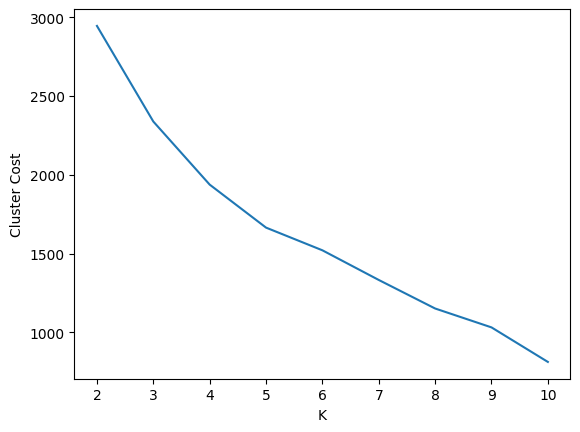

In [ ]:
sns.lineplot(x = "K", y = "Cluster Cost", data = clustering_costs.toPandas())

<Axes: xlabel='K', ylabel='Cluster Cost'>

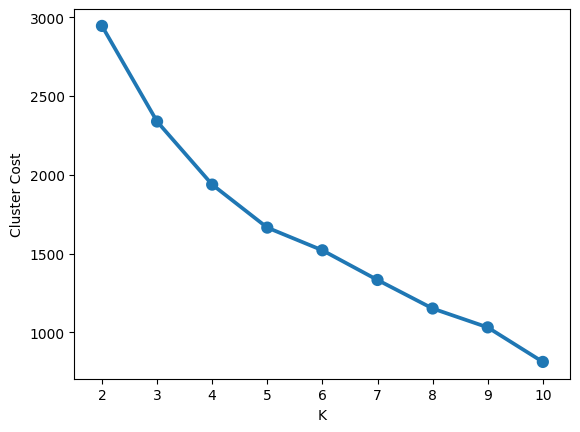

In [ ]:
sns.pointplot(x = "K", y = "Cluster Cost", data = clustering_costs.toPandas())

<Axes: xlabel='K', ylabel='Silhouette'>

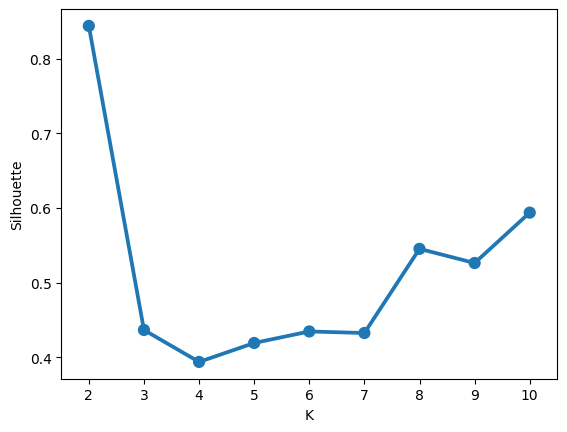

In [ ]:
sns.pointplot(x = "K", y = "Silhouette", data = clustering_costs.toPandas())

####Model Building

Now, based on the optimal value of k that found, we are going to build the clustering model. In order to train and test the model the data set need to be split into a training data set and a test data set. For this purpose, 80% of the data is used to train the model, and 20% will be used for testing.

In [27]:
# split data into training and test sets randomly and set seed for reproducibility
train_set, test_set = processed_df.randomSplit([0.8, 0.2], seed = 24)

train_set.cache()
test_set.cache()

print(f"Dataset stats:\n-- Main dataset: {processed_df.count()}")
print(f"-- Train set: {train_set.count()}\n-- Test set: {test_set.count()}")

Dataset stats:
-- Main dataset: 829275
-- Train set: 663807
-- Test set: 165468


Now, we will model K-Means based on the optimal k.

In [28]:
# create initial K-Means model
kmeans = KMeans(k = 8, featuresCol = "features", predictionCol = "cluster", maxIter=10, seed = 1)

In [29]:
# train and fit the train set to the model
km_model = kmeans.fit(train_set)

We make predictions on the test set using the `transform()` method. This will only use the '*features*' column and will add new columns '*prediction*' as cluster code.

In [30]:
# run model with train and test dataset to get predictions
km_predict_train = km_model.transform(train_set)
km_predict_test = km_model.transform(test_set)

In [31]:
km_predict_test.show()

+-------------------+-------+--------+------+------------------+-------+
|           datetime|    lat|     lon|  base|          features|cluster|
+-------------------+-------+--------+------+------------------+-------+
|2014-08-01 00:00:00|40.7406|-73.9902|B02598|[40.7406,-73.9902]|      2|
|2014-08-01 00:00:00|40.7623|-73.9751|B02617|[40.7623,-73.9751]|      3|
|2014-08-01 00:01:00|40.7108|-73.9679|B02598|[40.7108,-73.9679]|      7|
|2014-08-01 00:01:00|40.7403|-74.0081|B02598|[40.7403,-74.0081]|      2|
|2014-08-01 00:03:00|40.7231|-73.8529|B02598|[40.7231,-73.8529]|      6|
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|[40.7366,-73.9906]|      2|
|2014-08-01 00:04:00|40.7325|-74.0036|B02598|[40.7325,-74.0036]|      2|
|2014-08-01 00:06:00|40.7226|-74.0034|B02598|[40.7226,-74.0034]|      2|
|2014-08-01 00:06:00|40.7268|-73.9474|B02617|[40.7268,-73.9474]|      7|
|2014-08-01 00:06:00|40.7304|-74.0001|B02598|[40.7304,-74.0001]|      2|
|2014-08-01 00:06:00|40.7638|-73.9589|B02617|[40.76

In [32]:
print("KMeans Cluster Centers:")
for center in km_model.clusterCenters():
    print(center)

KMeans Cluster Centers:
[ 40.88588658 -73.89264922]
[ 40.65703288 -73.77866867]
[ 40.73090938 -73.99787319]
[ 40.76662288 -73.9719082 ]
[ 40.69889143 -74.20130694]
[ 40.76875789 -73.4662081 ]
[ 40.76014765 -73.87306271]
[ 40.68621788 -73.96364795]


##**Evaluation**

After doing the clustering by K-Means on our datasets, we are going to review the results of the built models by common metrics.

###K-Means

We summarize the model over the train-set and able to get Accuracy, Coefficients, areaUnderROC (AUC), and some more. We are going to extract the summary from the returned models instance trained.

In [144]:
km_model_summary = km_model.summary

In [145]:
print("Summary of K-Means model:")
print("-- Cluster Sizes: %s\n-- Training Cost: %s"
      % (
         km_model_summary.clusterSizes,
         km_model_summary.trainingCost 
        ))

Summary of K-Means model:
-- Cluster Sizes: [11073, 21223, 268932, 224998, 6863, 1729, 30648, 98341]
-- Training Cost: 747.7115500912732


+----+-------+-----+
|hour|cluster|count|
+----+-------+-----+
|   0|      7|    4|
|   0|      5| 2117|
|   0|      0|  145|
|   0|      1|   13|
|   0|      6|   13|
|   0|      2|   52|
|   0|      3| 1773|
|   0|      4|  211|
|   1|      0|   44|
|   1|      7|    5|
|   1|      1|   11|
|   1|      2|   26|
|   1|      3| 1149|
|   1|      4|  155|
|   1|      5| 1506|
|   1|      6|   10|
|   2|      2|   13|
|   2|      3|  817|
|   2|      4|  131|
|   2|      5| 1075|
+----+-------+-----+
only showing top 20 rows



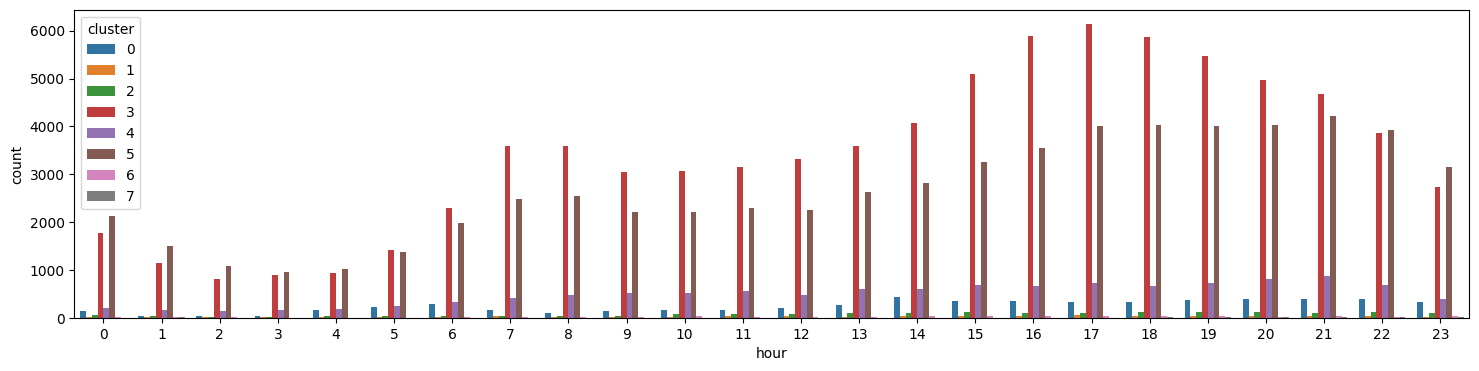

In [ ]:
d=km_predict_test.groupBy(hour("datetime").alias("hour"), "cluster").count().alias("count").sort("hour")
d.show(20)
plt.figure(figsize=(18,4))
sns.barplot(x="hour", y="count", hue="cluster", data = d.toPandas());

##**Saving and Reloading**

The built model can be saved and reloaded and used later according to the following.

In [ ]:
# save model
km_model.write().overwrite().save("uber_km_model")

# load model
km_model_loaded = km_model.load("uber_km_model")

#km_model_loaded.summary.show()

Finally, we can stop spark context session.

In [ ]:
# stop spark session 
spark.stop()  

##**Exploratory Data Analysis**
Before building any model, it is essential to understand the dataset. Exploratory Data Analysis (EDA) is an analysis approach that identifies general patterns in the data. These patterns include outliers and features of the data that might be unexpected.

In other words, EDA is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis. This involves inspecting the dataset from many angles, describing & summarizing it without making any assumptions about its contents.

As mentioned earlier, although PySpark has many similarities with Pandas, but it lacks some features, such as supporting visualizations like plot. So doing some things might be complicated and hard in PySpark. Also, Pandas is not appropriate for real-world big data because that requires the whole data to be in the memory for processing and visualization.

###Univariate Analysis
The univariate analysis explores each variable in a data set, separately. In this section, we are going to  explore categorical (discrete) and numerical (continuous) variables in the dataset one by one. 

**Date/Time (Hour)**

+----+-----+----+
|hour|count|   %|
+----+-----+----+
|   0|21451|2.59|
|   1|14471|1.75|
|   2|10105|1.22|
|   3|10376|1.25|
|   4|11774|1.42|
|   5|16525|1.99|
|   6|24907| 3.0|
|   7|34064|4.11|
|   8|34566|4.17|
|   9|30195|3.64|
|  10|30706| 3.7|
|  11|31778|3.83|
|  12|32106|3.87|
|  13|35764|4.31|
|  14|40644| 4.9|
|  15|48197|5.81|
|  16|53481|6.45|
|  17|57122|6.89|
|  18|55390|6.68|
|  19|53008|6.39|
|  20|51674|6.23|
|  21|51354|6.19|
|  22|46008|5.55|
|  23|33609|4.05|
+----+-----+----+



[Text(0.5, 1.0, 'Hour vs. Trips')]

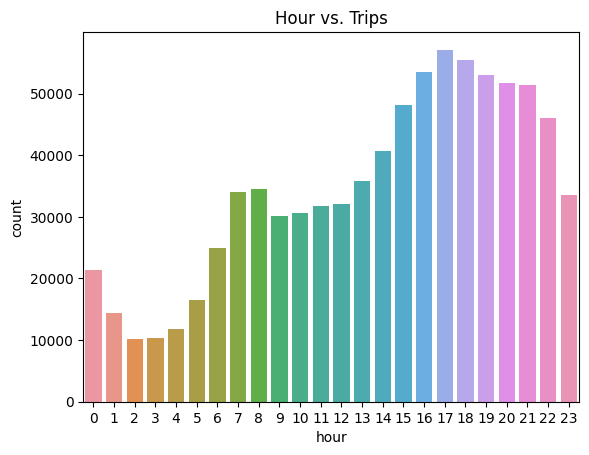

In [ ]:
hours = processed_df.groupBy(hour("datetime").alias("hour")).agg(count("datetime").alias("count"), round((count("datetime")/df.count())*100,2).alias('%')).sort("hour")
hours.show(24)
sns.barplot(x = "hour", y = "count", data = hours.toPandas()).set(title="Hour vs. Trips")
#sns.lineplot(x = "hour", y = "count", data = hours.toPandas())

**Date/Time (Day of Week)**

+---------+------+-----+
| week_day| count|    %|
+---------+------+-----+
|   Friday|148674|17.93|
|   Monday| 91633|11.05|
| Saturday|132225|15.94|
|   Sunday|110246|13.29|
| Thursday|124117|14.97|
|  Tuesday|107124|12.92|
|Wednesday|115256| 13.9|
+---------+------+-----+



[Text(0.5, 1.0, 'Day of Week vs. Trips')]

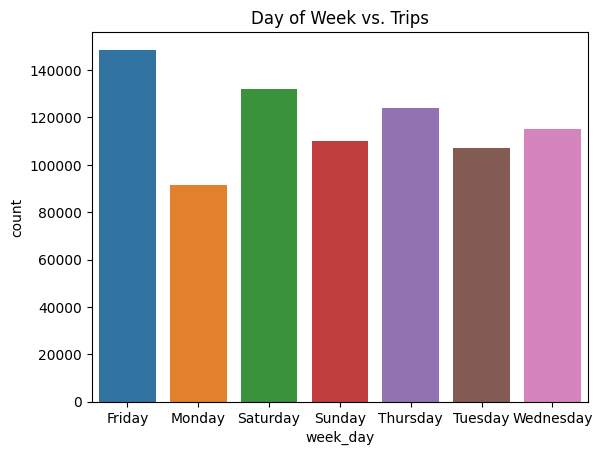

In [ ]:
weekdays = processed_df.groupBy(date_format("datetime", "EEEE").alias("week_day")).agg(count("datetime").alias("count"), round((count("datetime")/df.count())*100,2).alias('%')).sort("week_day")
weekdays.show()
sns.barplot(x = "week_day", y = "count", data = weekdays.toPandas()).set(title="Day of Week vs. Trips")

+--------+-------+-----+
|week_day|cluster|count|
+--------+-------+-----+
|  Friday|      6| 1271|
|  Friday|      5|   94|
|  Friday|      0|  480|
|  Friday|      4|  284|
|  Friday|      2|12264|
|  Friday|      3| 9924|
|  Friday|      1|  785|
|  Friday|      7| 4268|
|  Monday|      5|   34|
|  Monday|      1|  783|
|  Monday|      4|  265|
|  Monday|      7| 2295|
|  Monday|      3| 6625|
|  Monday|      2| 7030|
|  Monday|      0|  273|
|  Monday|      6|  936|
|Saturday|      5|  141|
|Saturday|      1|  741|
|Saturday|      0|  553|
|Saturday|      6| 1150|
+--------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Week Day by Cluster vs. Trips')]

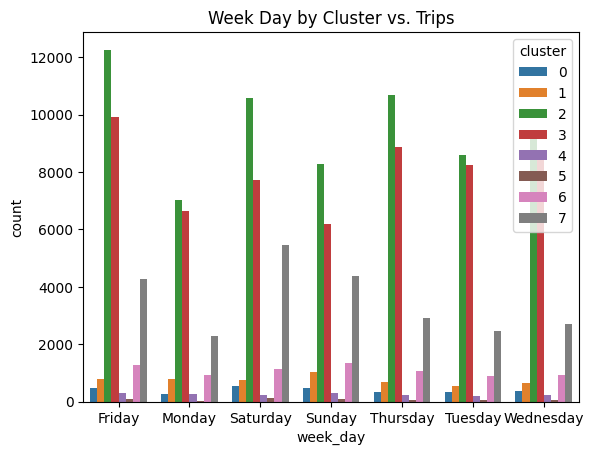

In [ ]:
weekdays_by_cluster = km_predict_test.groupBy(date_format("datetime", "EEEE").alias("week_day"), "cluster").count().alias("count").sort("week_day")
weekdays_by_cluster.show(20)
sns.barplot(x = "week_day", y = "count", hue="cluster", data = weekdays_by_cluster.toPandas()).set(title="Week Day by Cluster vs. Trips")

**Date/Time (Day of Month)**

+---------+-----+----+
|month_day|count|   %|
+---------+-----+----+
|        1|32353| 3.9|
|        2|28678|3.46|
|        3|23146|2.79|
|        4|24952|3.01|
|        5|28094|3.39|
|        6|30495|3.68|
|        7|32759|3.95|
|        8|30411|3.67|
|        9|26286|3.17|
|       10|20584|2.48|
|       11|22632|2.73|
|       12|29646|3.57|
|       13|29788|3.59|
|       14|30457|3.67|
|       15|28974|3.49|
|       16|26234|3.16|
|       17|21209|2.56|
|       18|21956|2.65|
|       19|24834|2.99|
|       20|27955|3.37|
+---------+-----+----+
only showing top 20 rows



[Text(0.5, 1.0, 'Day of Month vs. Trips')]

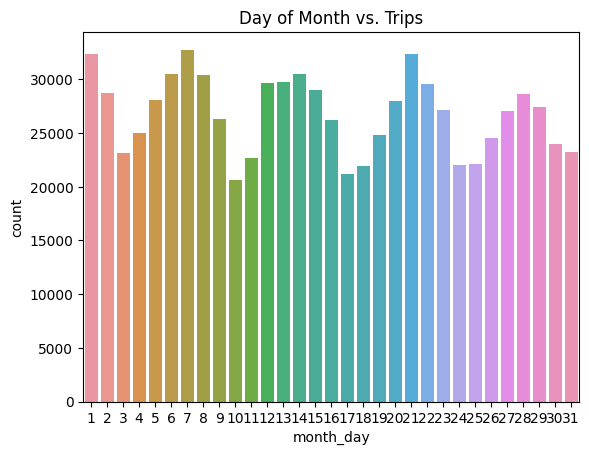

In [ ]:
month_days = processed_df.groupBy(date_format("datetime", "d").cast(IntegerType()).alias("month_day")).agg(count("datetime").alias("count"), round((count("datetime")/df.count())*100,2).alias('%')).sort("month_day")
month_days.show()
sns.barplot(x = "month_day", y = "count", data = month_days.toPandas()).set(title="Day of Month vs. Trips")

In [ ]:
sns.histplot(x = "month_day", kde = True, data = month_days.toPandas()).set(title="Day of Month vs. Trips")

+--------+-------+-----+
|moth_day|cluster|count|
+--------+-------+-----+
|       1|      7|  890|
|       1|      0|   92|
|       1|      2| 2711|
|       1|      1|  153|
|       1|      3| 2282|
|       1|      4|   42|
|       1|      5|   20|
|       1|      6|  270|
|       2|      2| 2375|
|       2|      3| 1701|
|       2|      5|   20|
|       2|      1|  163|
|       2|      4|   51|
|       2|      0|   95|
|       2|      7| 1071|
|       2|      6|  238|
|       3|      3| 1347|
|       3|      0|   81|
|       3|      5|   11|
|       3|      6|  258|
+--------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Month Day by Cluster vs. Trips')]

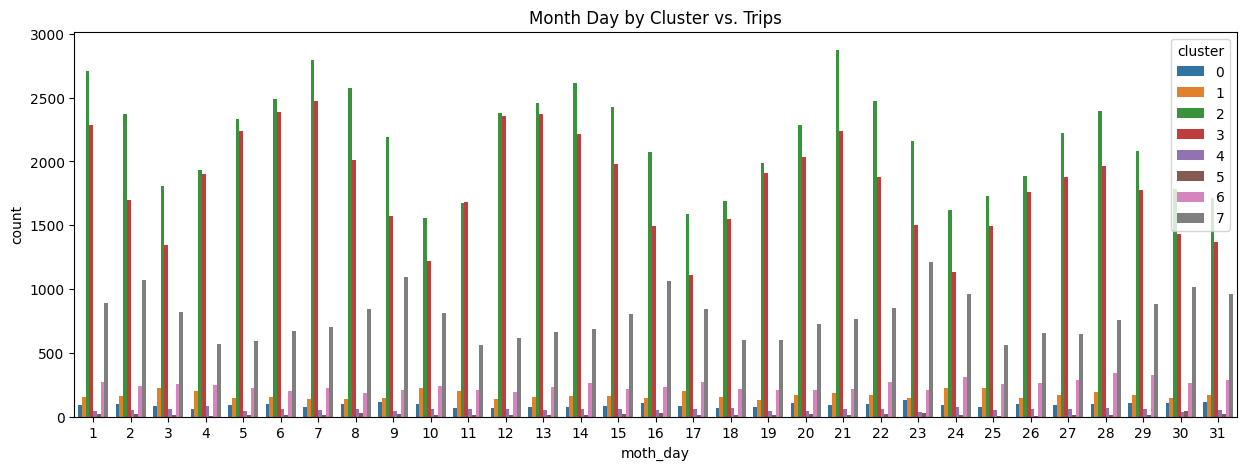

In [ ]:
monthdays_by_cluster = km_predict_test.groupBy(date_format("datetime", "d").cast(IntegerType()).alias("moth_day"), "cluster").count().alias("count").sort("moth_day")
monthdays_by_cluster.show(20)
plt.figure(figsize=(15,5))
sns.barplot(x = "moth_day", y = "count", hue="cluster", data = monthdays_by_cluster.toPandas()).set(title="Month Day by Cluster vs. Trips")

**Date/Time (Month)**

In [ ]:
processed_df.groupBy(month("datetime").alias("month")).agg(count("datetime").alias("count")).sort("count").show()

+-----+------+
|month| count|
+-----+------+
|    8|829275|
+-----+------+



**Base**

+------+------+-----+
|  base| count|    %|
+------+------+-----+
|B02512| 31472|  3.8|
|B02764| 48591| 5.86|
|B02682|173280| 20.9|
|B02598|220129|26.54|
|B02617|355803|42.91|
+------+------+-----+



[Text(0.5, 1.0, 'Base vs. Trips')]

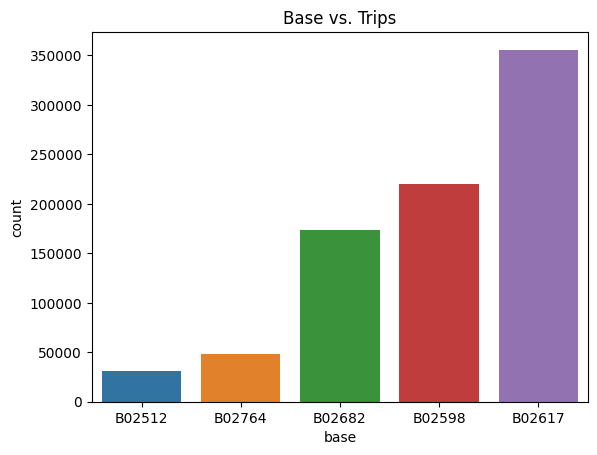

In [ ]:
base = processed_df.groupBy("base").agg(count("base").alias("count"), round((count("datetime")/df.count())*100,2).alias('%')).sort("count")
base.show()
#sns.pieplot(labels = "count", data = base.toPandas()).set(title="Base vs. Trips")
sns.barplot(x = "base", y = "count", data = base.toPandas()).set(title="Base vs. Trips")

+------+-------+-----+
|  base|cluster|count|
+------+-------+-----+
|B02512|      0|   85|
|B02512|      6|  280|
|B02512|      3| 2331|
|B02512|      2| 2653|
|B02512|      1|  192|
|B02512|      5|   36|
|B02512|      4|  165|
|B02512|      7|  477|
|B02598|      6| 2031|
|B02598|      5|  130|
|B02598|      7| 6411|
|B02598|      4|  465|
|B02598|      3|14970|
|B02598|      2|17870|
|B02598|      0|  699|
|B02598|      1| 1368|
|B02617|      5|  191|
|B02617|      2|28938|
|B02617|      7|10610|
|B02617|      6| 3248|
+------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Base vs. Trips')]

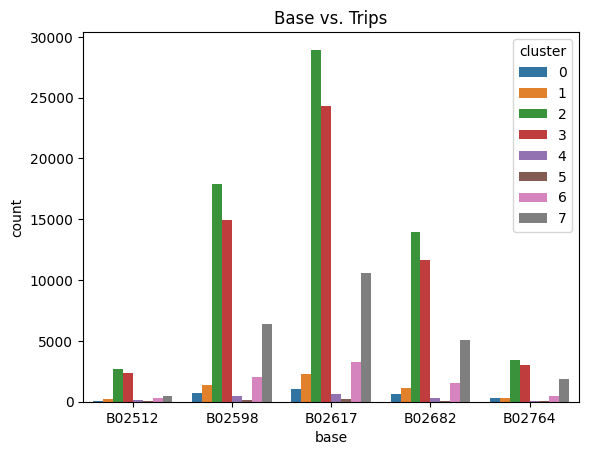

In [ ]:
base_by_cluster = km_predict_test.groupBy("base", "cluster").count().alias("count").sort("base")
base_by_cluster.show()
sns.barplot(x = "base", y = "count", hue="cluster", data = base_by_cluster.toPandas()).set(title="Base vs. Trips")

+---------+----+-----+
| week_day|hour|count|
+---------+----+-----+
|   Sunday|   1| 4759|
|   Sunday|  19| 6195|
| Thursday|   7| 5690|
|   Monday|   8| 5060|
|Wednesday|   6| 4546|
|   Monday|   5| 2786|
|Wednesday|   7| 6161|
|   Sunday|   2| 3439|
|Wednesday|   9| 4575|
| Thursday|  15| 6936|
|   Monday|  15| 5251|
|   Sunday|   5| 1459|
|Wednesday|   0| 1649|
| Saturday|  23| 8166|
| Saturday|   6| 2089|
|   Sunday|   8| 2766|
| Thursday|   8| 5454|
| Saturday|  10| 4317|
|  Tuesday|  11| 4093|
| Saturday|   1| 4209|
+---------+----+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Day by Hours vs. Trips')]

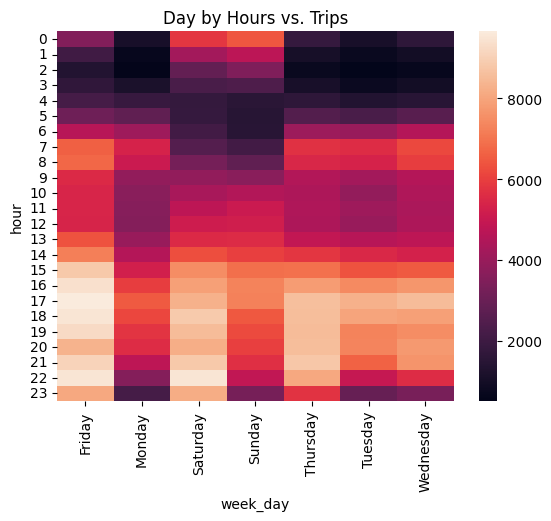

In [ ]:
hour_week_day = processed_df.groupBy(date_format("datetime", "EEEE").alias("week_day"), hour("datetime").alias("hour")).agg(count("datetime").alias("count"))
hour_week_day.show()
sns.heatmap(data = hour_week_day.toPandas().pivot("hour", "week_day", "count")).set(title="Day by Hours vs. Trips")

+----+------------------+
|hour|              mean|
+----+------------------+
|  12|40.740194972902295|
|  22|40.733788069466144|
|   1| 40.73266942851226|
|  13|40.739296295157295|
|   6| 40.73711587505529|
|  16|40.740020788691155|
|   3| 40.73702988627604|
|  20|  40.7362684638308|
|   5| 40.73226258396385|
|  19| 40.73691814820387|
|  15| 40.73974949270715|
|   9| 40.74120555721129|
|  17| 40.73968797661139|
|   4| 40.73232265160534|
|   8| 40.74223922351442|
|  23|40.731009170162864|
|   7| 40.74145706611092|
|  10|40.741392721292236|
|  21| 40.73543380457186|
|  11| 40.74112336836809|
+----+------------------+
only showing top 20 rows



[Text(0.5, 1.0, 'Day of Month vs. Trips')]

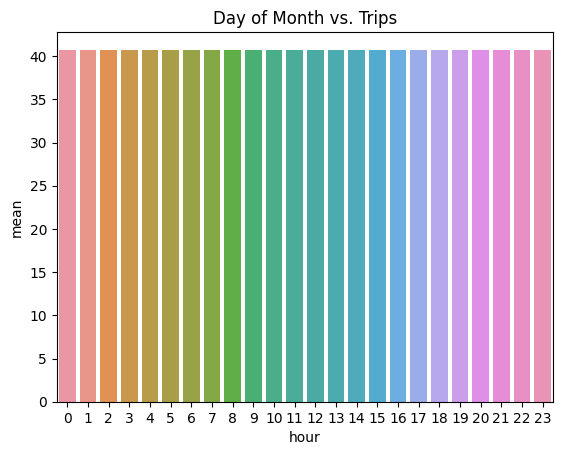

In [ ]:
hour_lat_mean = processed_df.groupBy(hour("DateTime").alias("hour")).agg(mean("lat").alias("mean"))
hour_lat_mean.show()
sns.barplot(x = "hour", y = "mean", data = hour_lat_mean.toPandas()).set(title="Day of Month vs. Trips")

[Text(0.5, 1.0, 'Lat vs. Trips')]

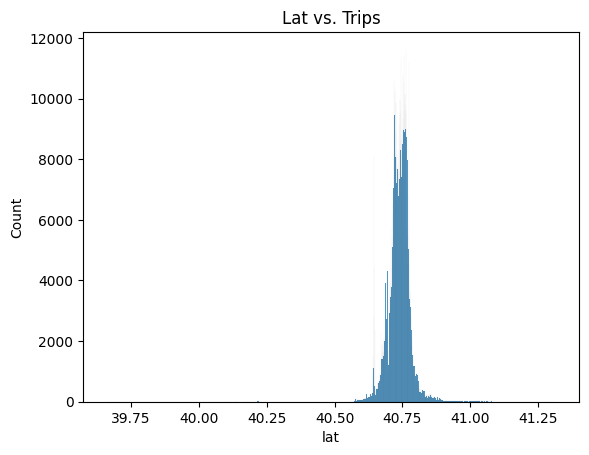

In [ ]:
sns.histplot(x = "lat", data = processed_df.toPandas()).set(title="Lat vs. Trips")

[Text(0.5, 1.0, 'Lat vs. Trips')]

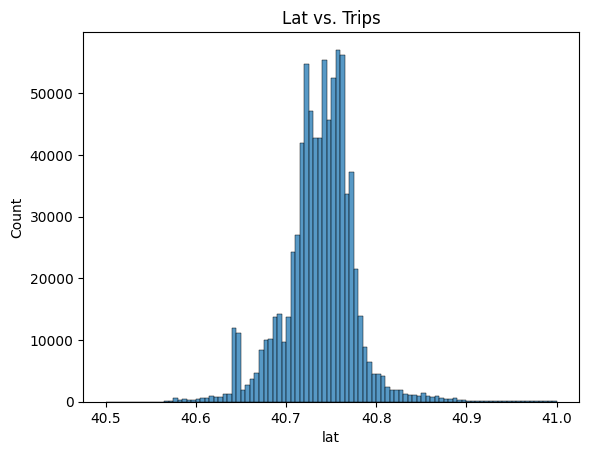

In [ ]:
sns.histplot(x = "lat", data = processed_df.toPandas(), bins=100, binrange = (40.5, 41)).set(title="Lat vs. Trips")

[Text(0.5, 1.0, 'Long vs. Trips')]

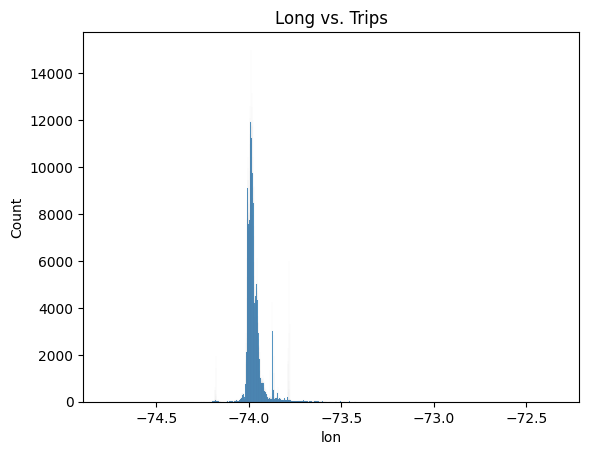

In [ ]:
sns.histplot(x = "lon", data = processed_df.toPandas()).set(title="Long vs. Trips")

<Axes: xlabel='lat', ylabel='Count'>

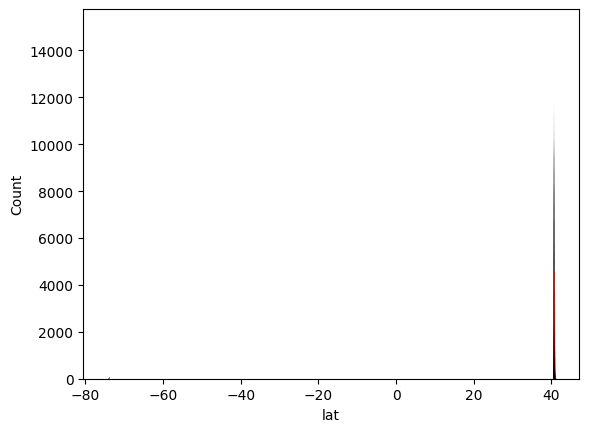

In [ ]:
sns.histplot(x = "lat", data = processed_df.toPandas(), color='r', alpha=.5, label = 'longitude')
sns.histplot(x = "lon", data = processed_df.toPandas(), color='b', alpha=.5, label = 'latitude')


###Multivariate Analysis
The multivariate analysis looks into the relationship between two or more variables. In this section, we are going to investigate relationships among variables for each observational or experimental unit at a time.

**Day by Hour**

+---------+----+-----+
| week_day|hour|count|
+---------+----+-----+
|   Sunday|   1| 4759|
|   Sunday|  19| 6195|
| Thursday|   7| 5690|
|   Monday|   8| 5060|
|Wednesday|   6| 4546|
|   Monday|   5| 2786|
|Wednesday|   7| 6161|
|   Sunday|   2| 3439|
|Wednesday|   9| 4575|
| Thursday|  15| 6936|
|   Monday|  15| 5251|
|   Sunday|   5| 1459|
|Wednesday|   0| 1649|
| Saturday|  23| 8166|
| Saturday|   6| 2089|
|   Sunday|   8| 2766|
| Thursday|   8| 5454|
| Saturday|  10| 4317|
|  Tuesday|  11| 4093|
| Saturday|   1| 4209|
+---------+----+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Day by Hours vs. Trips')]

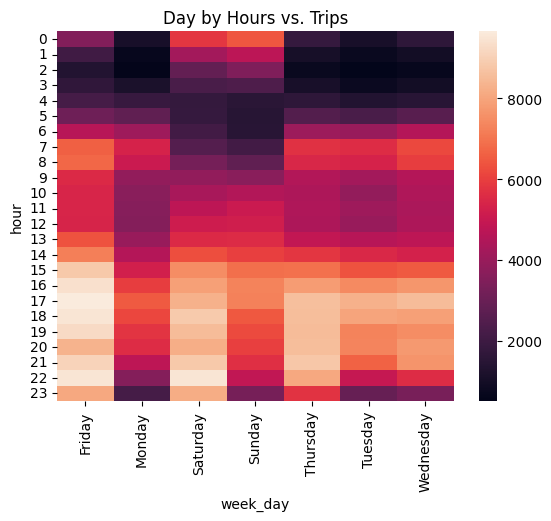

In [ ]:
hour_week_day = processed_df.groupBy(date_format("datetime", "EEEE").alias("week_day"), hour("datetime").alias("hour")).agg(count("datetime").alias("count"))
hour_week_day.show()
sns.heatmap(data = hour_week_day.toPandas().pivot("hour", "week_day", "count")).set(title="Day by Hours vs. Trips")

**Hour by Cluster**

+----+-------+-----+
|hour|cluster|count|
+----+-------+-----+
|   0|      7|  936|
|   0|      5|   12|
|   0|      0|   67|
|   0|      1|  130|
|   0|      6|   96|
|   0|      2| 2037|
|   0|      3|  998|
|   0|      4|   52|
|   1|      0|   47|
|   1|      7|  635|
|   1|      2| 1443|
|   1|      1|   33|
|   1|      3|  622|
|   1|      4|   26|
|   1|      5|   10|
|   1|      6|   90|
|   2|      0|   37|
|   2|      7|  446|
|   2|      1|   36|
|   2|      2| 1044|
+----+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Hour by Cluster vs. Trips')]

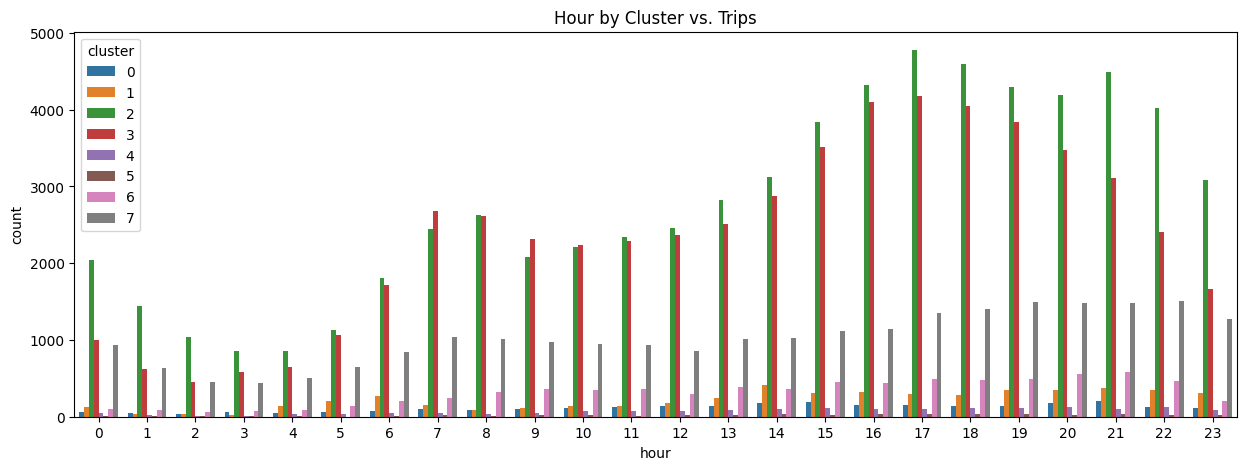

In [ ]:
hours_by_cluster = km_predict_test.groupBy(hour("datetime").alias("hour"), "cluster").count().alias("count").sort("hour")
hours_by_cluster.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "hour", y = "count", hue="cluster", data = hours_by_cluster.toPandas()).set(title="Hour by Cluster vs. Trips")

**Week Day by Cluster**

+--------+-------+-----+
|week_day|cluster|count|
+--------+-------+-----+
|  Friday|      6| 1271|
|  Friday|      5|   94|
|  Friday|      0|  480|
|  Friday|      4|  284|
|  Friday|      2|12264|
|  Friday|      3| 9924|
|  Friday|      1|  785|
|  Friday|      7| 4268|
|  Monday|      5|   34|
|  Monday|      1|  783|
|  Monday|      4|  265|
|  Monday|      7| 2295|
|  Monday|      3| 6625|
|  Monday|      2| 7030|
|  Monday|      0|  273|
|  Monday|      6|  936|
|Saturday|      5|  141|
|Saturday|      1|  741|
|Saturday|      0|  553|
|Saturday|      6| 1150|
+--------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Week Day by Cluster vs. Trips')]

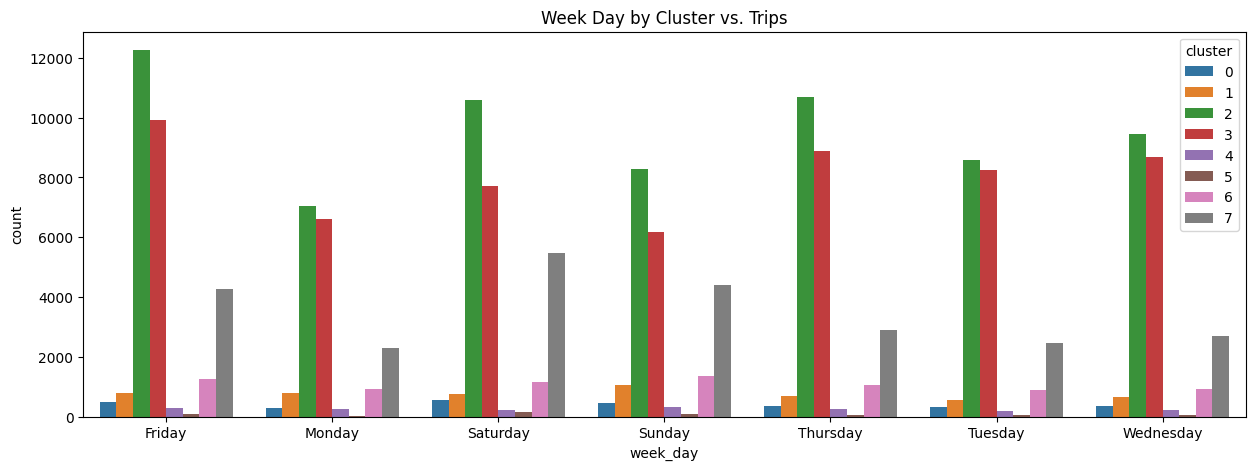

In [ ]:
weekdays_by_cluster = km_predict_test.groupBy(date_format("datetime", "EEEE").alias("week_day"), "cluster").count().alias("count").sort("week_day")
weekdays_by_cluster.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "week_day", y = "count", hue="cluster", data = weekdays_by_cluster.toPandas()).set(title="Week Day by Cluster vs. Trips")

**Month Day by Cluster**

+--------+-------+-----+
|moth_day|cluster|count|
+--------+-------+-----+
|       1|      7|  890|
|       1|      0|   92|
|       1|      2| 2711|
|       1|      1|  153|
|       1|      3| 2282|
|       1|      4|   42|
|       1|      5|   20|
|       1|      6|  270|
|       2|      2| 2375|
|       2|      3| 1701|
|       2|      5|   20|
|       2|      1|  163|
|       2|      4|   51|
|       2|      0|   95|
|       2|      7| 1071|
|       2|      6|  238|
|       3|      3| 1347|
|       3|      0|   81|
|       3|      5|   11|
|       3|      6|  258|
+--------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Month Day by Cluster vs. Trips')]

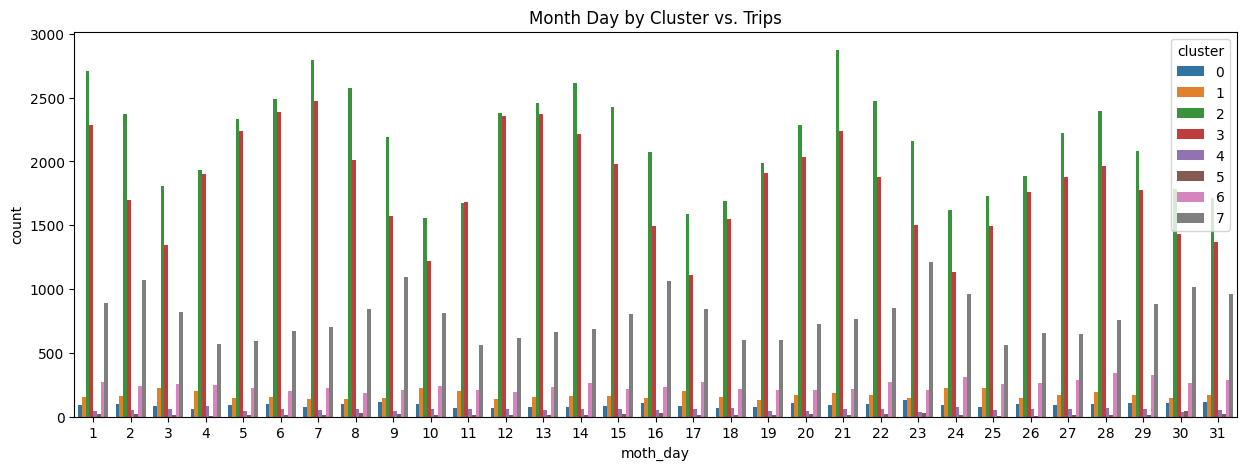

In [ ]:
monthdays_by_cluster = km_predict_test.groupBy(date_format("datetime", "d").cast(IntegerType()).alias("moth_day"), "cluster").count().alias("count").sort("moth_day")
monthdays_by_cluster.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "moth_day", y = "count", hue="cluster", data = monthdays_by_cluster.toPandas()).set(title="Month Day by Cluster vs. Trips")

**Base by Cluster**

+------+-------+-----+
|  base|cluster|count|
+------+-------+-----+
|B02512|      0|   85|
|B02512|      6|  280|
|B02512|      3| 2331|
|B02512|      2| 2653|
|B02512|      1|  192|
|B02512|      5|   36|
|B02512|      4|  165|
|B02512|      7|  477|
|B02598|      6| 2031|
|B02598|      5|  130|
|B02598|      7| 6411|
|B02598|      4|  465|
|B02598|      3|14970|
|B02598|      2|17870|
|B02598|      0|  699|
|B02598|      1| 1368|
|B02617|      5|  191|
|B02617|      2|28938|
|B02617|      7|10610|
|B02617|      6| 3248|
+------+-------+-----+
only showing top 20 rows



[Text(0.5, 1.0, 'Base by Cluster vs. Trips')]

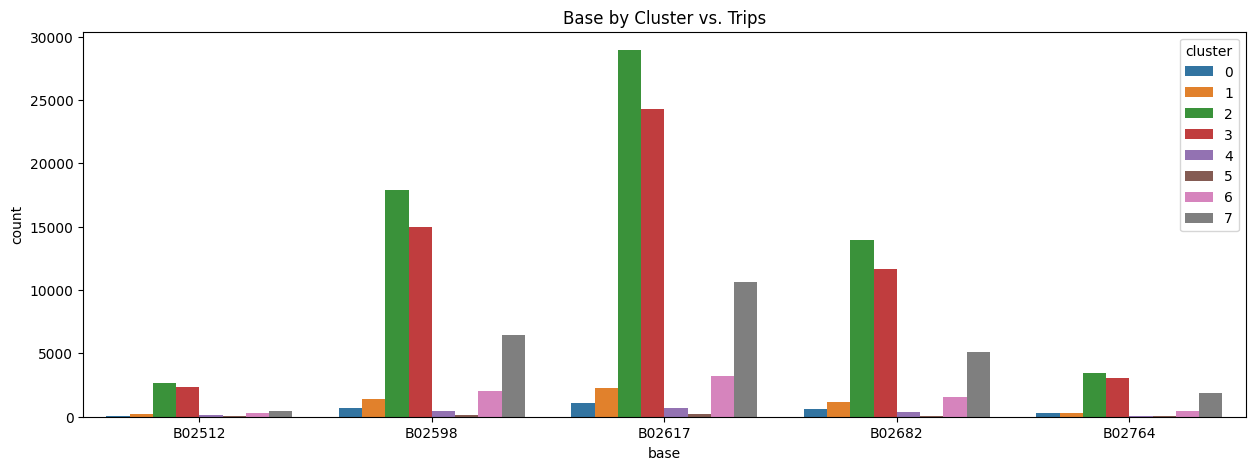

In [ ]:
base_by_cluster = km_predict_test.groupBy("base", "cluster").count().alias("count").sort("base")
base_by_cluster.show()
plt.figure(figsize=(15,5))
sns.barplot(x = "base", y = "count", hue="cluster", data = base_by_cluster.toPandas()).set(title="Base by Cluster vs. Trips")

**Lat by Long**

<Axes: xlabel='lat', ylabel='Count'>

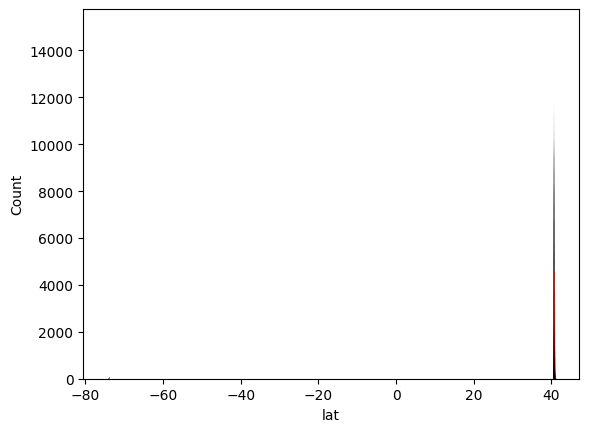

In [ ]:
sns.histplot(x = "lat", data = processed_df.toPandas(), color='r', alpha=.5, label = 'longitude')
sns.histplot(x = "lon", data = processed_df.toPandas(), color='b', alpha=.5, label = 'latitude')

#**Data Streaming**

Real-time data is the need of the hour for businesses to make timely decisions, especially in cases of fraud detection or customer behavior analysis. Relying on traditional batch processing is not effective now. Data streaming is a powerful technology that provides organizations with the ability to process and analyze large amounts of data in real time. 

Data streaming is the process of transmitting a continuous flow of data, also known as streams, typically fed into stream processing software to derive valuable insights. A data stream consists of a series of data elements ordered in time.





Using Spark Streaming we can read from Kafka topic and write to Kafka topic in text, csv, and json formats, Next, we will show how to stream from Kafka messages in json format using from_json() and to_json() SQL functions.



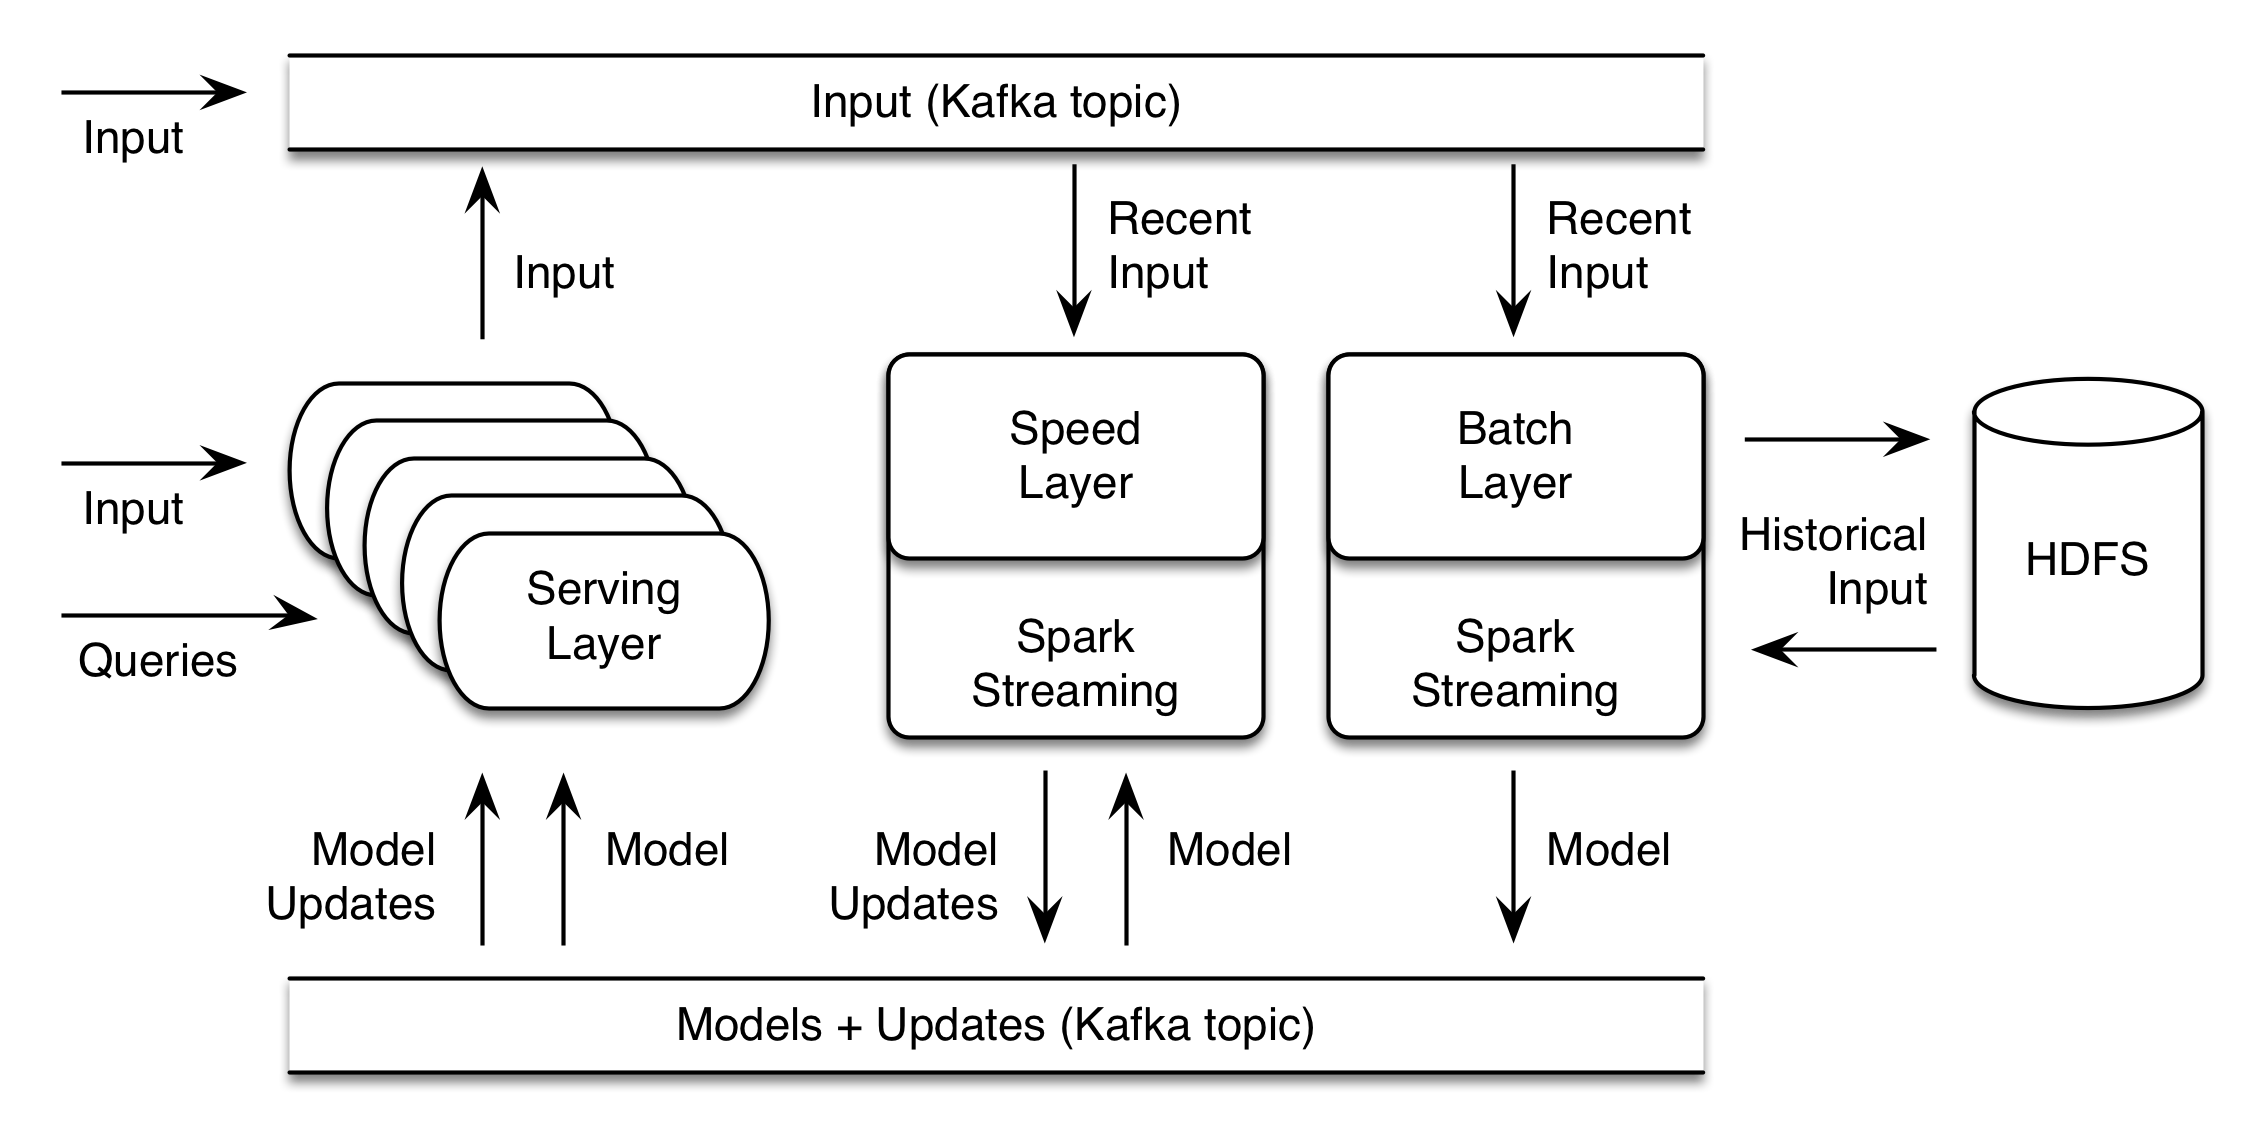

It is worth mentioning that we can also create streaming data by Mllib.

##**Run Kafka**

Using the default configurations (provided by Apache Kafka) for spinning up the instances.

In [39]:
!./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties
!./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


Once the instances are started as daemon processes, grep for `kafka` in the processes list. The two java processes correspond to zookeeper and the kafka instances.

In [ ]:
!ps -ef | grep kafka

root         942     294 35 18:41 ?        00:01:16 /usr/lib/jvm/java-11-openjdk-amd64/bin/java -cp /usr/local/lib/python3.10/dist-packages/pyspark/conf:/usr/local/lib/python3.10/dist-packages/pyspark/jars/* -Xmx1g -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.action=ALL-UNNAMED --add-opens=java.base/sun.util.calendar=ALL-UNNAMED --add-opens=java.security.jgss/sun.security.krb5=ALL-UNNAMED -Djdk.reflect.useDirectMethodHandle=false org.apache.spark.

Create the kafka topics with the following specs:

- stream-train: partitions=1, replication-factor=1 
- stream-test: partitions=2, replication-factor=1 

In [40]:
!./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic stream-train
!./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 2 --topic stream-test

Created topic stream-train.
Created topic stream-test.


Describe the topic for details on the configuration

In [41]:
!./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stream-train
!./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic stream-test

Topic: stream-train	TopicId: tyPnLTPtQL-_1nyqbPAGqA	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: stream-train	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
Topic: stream-test	TopicId: 3t10uEueTQKe4hABb6haAQ	PartitionCount: 2	ReplicationFactor: 1	Configs: 
	Topic: stream-test	Partition: 0	Leader: 0	Replicas: 0	Isr: 0
	Topic: stream-test	Partition: 1	Leader: 0	Replicas: 0	Isr: 0


In [42]:
kafka_topic_name = "stream-train"
kafka_bootstrap_servers = 'localhost:9092'

Here, we explain how to set up Kafka Producer and Kafka Consumer on PySpark to read data in batches at certain intervals and process the messages.



##**Streaming Producer**

We set the necessary setting and then start sending each trip within the json through the Kafka topics.

In [58]:
import json
import time

kafka_producer_object = KafkaProducer(bootstrap_servers = kafka_bootstrap_servers,
              value_serializer=lambda x: json.dumps(x, default=str).encode("utf-8"))

for trip in test_set.limit(5).collect():
    print("Message to be send: ", trip)
    kafka_producer_object.send(kafka_topic_name, trip)
    time.sleep(1)

Message to be send:  Row(datetime=datetime.datetime(2014, 8, 1, 0, 0), lat=40.7406, lon=-73.9902, base='B02598', features=DenseVector([40.7406, -73.9902]))
Message to be send:  Row(datetime=datetime.datetime(2014, 8, 1, 0, 0), lat=40.7623, lon=-73.9751, base='B02617', features=DenseVector([40.7623, -73.9751]))
Message to be send:  Row(datetime=datetime.datetime(2014, 8, 1, 0, 1), lat=40.7108, lon=-73.9679, base='B02598', features=DenseVector([40.7108, -73.9679]))
Message to be send:  Row(datetime=datetime.datetime(2014, 8, 1, 0, 1), lat=40.7403, lon=-74.0081, base='B02598', features=DenseVector([40.7403, -74.0081]))
Message to be send:  Row(datetime=datetime.datetime(2014, 8, 1, 0, 3), lat=40.7231, lon=-73.8529, base='B02598', features=DenseVector([40.7231, -73.8529]))


##**Streaming Consumer**

Now that Kafka producer is set up, we proceed with configuring spark streaming to act as a consumer.



In [60]:
kafka_consumer_object = KafkaConsumer(kafka_topic_name, bootstrap_servers = kafka_bootstrap_servers,
                                              #auto_offset_reset="latest")
                                              auto_offset_reset="earliest")
cnt = 0
for event in kafka_consumer_object:
    #print (event)
    print (json.loads(event.value))
    cnt += 1
    if (cnt > 5):
      break;

['2014-08-01 00:00:00', 40.7406, -73.9902, 'B02598', '[40.7406,-73.9902]']
['2014-08-01 00:00:00', 40.7623, -73.9751, 'B02617', '[40.7623,-73.9751]']
['2014-08-01 00:01:00', 40.7108, -73.9679, 'B02598', '[40.7108,-73.9679]']
['2014-08-01 00:01:00', 40.7403, -74.0081, 'B02598', '[40.7403,-74.0081]']
['2014-08-01 00:03:00', 40.7231, -73.8529, 'B02598', '[40.7231,-73.8529]']
Column<'datetime'>


Since we have to read a real-time data stream from a Kafka topic its important to connect Spark Streaming to a Kafka Topic



In [ ]:
consumer_df = spark.readStream.format("kafka")\
              .option("kafka.bootstrap.servers", kafka_bootstrap_servers)\
              .option("subscribe", kafka_topic_name)\
              .load()
              #.option("startingOffsets", "latest")\
              #.load()

In [70]:


consumer = KafkaConsumer('topic')
df_kafka = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", 'localhost:9092') \
    .option("subscribe", kafka_topic_name) \
    .load()

AnalysisException: ignored

All the data in a Kafka topic is stored in the format of `KEY: VALUE`. Along with key and value, other metadata like timestamp is also stored in the Kafka topic. To extract the actual information from the Kafka topic we need to get the value from the stored JSON.

In [ ]:
base_df = consumer_df.selectExpr("CAST(value as STRING)", "timestamp")
base_df.printSchema()

Applying our optimal schema


In [ ]:
info_dataframe = base_df.select(
        from_json(col("value"), optimal_schema).alias("trips"), "timestamp"
    )

In [ ]:
info_df_fin = info_dataframe.select("trips.*", "timestamp")
info_df_fin.show()

#**Data Storing**

In this section, we will review the data storage and the results in the database. For this purpose, we want to practice how to save and read data in Cassandra.

So, we run a single cluster node of Cassandra.

In [38]:
!./cassandra/bin/cassandra -R

!echo "Waiting for 30 secs until cassandra services are up and running"
!sleep 30

CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.deserializeLargeSubset (Lorg/apache/cassandra/io/util/DataInputPlus;Lorg/apache/cassandra/db/Columns;I)Lorg/apache/cassandra/db/Columns;
CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubset (Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;ILorg/apache/cassandra/io/util/DataOutputPlus;)V
CompilerOracle: dontinline org/apache/cassandra/db/Columns$Serializer.serializeLargeSubsetSize (Ljava/util/Collection;ILorg/apache/cassandra/db/Columns;I)I
CompilerOracle: dontinline org/apache/cassandra/db/commitlog/AbstractCommitLogSegmentManager.advanceAllocatingFrom (Lorg/apache/cassandra/db/commitlog/CommitLogSegment;)V
CompilerOracle: dontinline org/apache/cassandra/db/transform/BaseIterator.tryGetMoreContents ()Z
CompilerOracle: dontinline org/apache/cassandra/db/transform/StoppingTransformation.stop ()V
CompilerOracle: dontinline org/apache/cassandra/db/transform/StoppingTransforma

In [163]:
!ps -ef  | grep cassandra
#!ps auwx | grep cassandra

root       11245       1  1 14:21 ?        00:03:48 /usr/lib/jvm/java-8-openjdk-amd64/bin/java -ea -da:net.openhft... -XX:+UseThreadPriorities -XX:+HeapDumpOnOutOfMemoryError -Xss256k -XX:+AlwaysPreTouch -XX:-UseBiasedLocking -XX:+UseTLAB -XX:+ResizeTLAB -XX:+UseNUMA -XX:+PerfDisableSharedMem -Djava.net.preferIPv4Stack=true -XX:ThreadPriorityPolicy=42 -XX:+UseParNewGC -XX:+UseConcMarkSweepGC -XX:+CMSParallelRemarkEnabled -XX:SurvivorRatio=8 -XX:MaxTenuringThreshold=1 -XX:CMSInitiatingOccupancyFraction=75 -XX:+UseCMSInitiatingOccupancyOnly -XX:CMSWaitDuration=10000 -XX:+CMSParallelInitialMarkEnabled -XX:+CMSEdenChunksRecordAlways -XX:+CMSClassUnloadingEnabled -XX:+PrintGCDetails -XX:+PrintGCDateStamps -XX:+PrintHeapAtGC -XX:+PrintTenuringDistribution -XX:+PrintGCApplicationStoppedTime -XX:+PrintPromotionFailure -XX:+UseGCLogFileRotation -XX:NumberOfGCLogFiles=10 -XX:GCLogFileSize=10M -Xloggc:/content/cassandra/logs/gc.log -Xms3245M -Xmx3245M -Xmn200M -XX:+UseCondCardMark -XX:CompileComm

Interaction with Cassandra database, is done through cluster object. `Cassandra.Cluster()` module defines cluster class. We first need to declare cluster object. All transactions such as insert, update, and etc. are performed by starting a session with a keyspace.



In [39]:
# provide contact points and port, the default is Cluster(["127.0.0.1"], port = 9042)
cluster = Cluster()
# building a cassandra session
cassandra = cluster.connect()

Fundamental note of the using of Cassandra database is `keyspace` which can be considered analogous to a database.
A keyspace in Cassandra is a namespace that defines data replication on nodes and is required to manage enormous volumes of data across numerous commodity servers. A cluster contains one keyspace per node. Cassandra Keyspace is used as a data container similar to RDMS and NoSQL Column families, indexes, user-defined types, data center awareness, a keyspace strategy, a replication factor, etc. are all stored in the keyspace. Additionally, more than one keyspace might exist for each application.

The replication option is to specify the Replica Placement Strategy and the number of replicas wanted. The following table lists all the replica placement strategies:

* Simple Strategy: Specifies a simple replication factor for the cluster.
* Network Topology Strategy:	Using this option, you can set the replication factor for each data-center independently.
* Old Network Topology Strategy:	This is a legacy replication strategy.

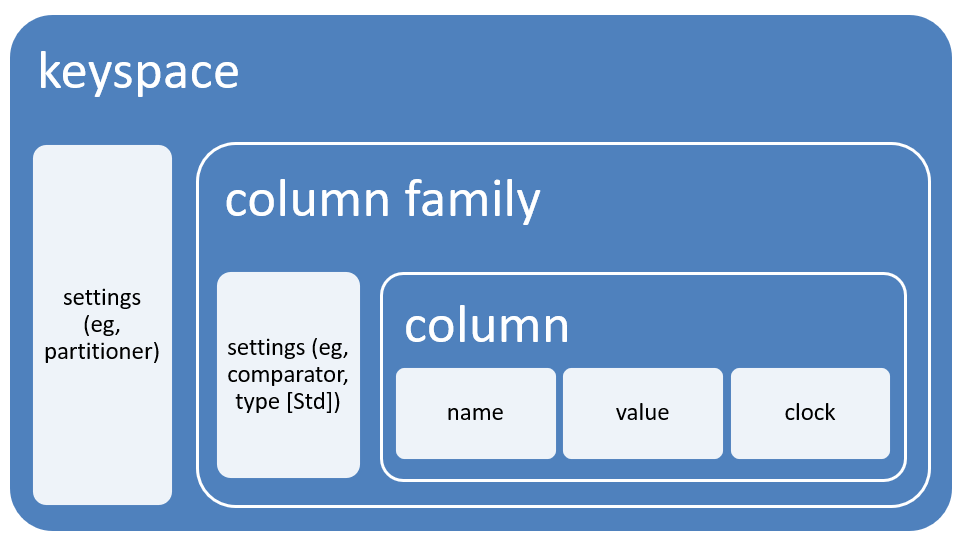

Given below is the syntax for creating a keyspace using the statement `create keyspace`.


In [40]:
# single cluster information
cassandra.execute("create keyspace uber with replication={'class': 'SimpleStrategy', 'replication_factor': 1};")

In [41]:
# select a node to perform the tasks
cassandra = cluster.connect("uber")

We need `GROUP BY` in command to process some queries. Cassandra version 3.10 or later supports it clauses to run `GROUP BY` with `COUNT()` or other aggregate functions. However, there are some restrictions on how it can be used in Cassandra, such as:

* It only works on the columns that are part of the `PRIMARY KEY`.
* It only works with `SELECT` statements that have an `ALLOW FILTERING` clause.
* It only works with the aggregate functions `count`, `min`, `max`, `sum` and `avg`.
* It only works with a single partition key or all the partition keys.
* It currently only supports groups of columns following their declared order in the `PRIMARY KEY`

On the other, there is no way to define a default value in Cassandra unfortunately.



According to the limitations of Cassandra and the agendas, we run the following syntax to create the table.

In [138]:
# create a table
"""
query =""
CREATE TABLE uber_trips (
id uuid,
datetime Timestamp,
lat double,
lon double,
base text,
cluster int,
PRIMARY KEY (cluster, lat, lon, id)
)
""
"""

query = "CREATE TABLE uber_trips (\
        id uuid,\
        datetime Timestamp,\
        lat double,\
        lon double,\
        base text,\
        cluster int,\
        PRIMARY KEY (cluster, lat, lon, id)\
        )"

cassandra.execute(query)

In [75]:
# get the description of a table
result = cassandra.execute("DESCRIBE TABLE uber_trips")
description = spark.createDataFrame([row for row in result])
description.show()

+-------------+-----+----------+--------------------+
|keyspace_name| type|      name|    create_statement|
+-------------+-----+----------+--------------------+
|         uber|table|uber_trips|CREATE TABLE uber...|
+-------------+-----+----------+--------------------+



By executing this syntax, the table will be deleted.

In [137]:
# reomve/delete a table
cassandra.execute("DROP TABLE uber_trips")

In [ ]:
selected_df = test_set.limit(30)
selected_df = km_predict_test.limit(30)
#selected_df

In [52]:
# Convert the DataFrame to a JSON array
json_array = selected_df.toJSON().collect()
  
# Print the JSON array
json_array
print("JSON array:",json_array)

JSON array: ['{"datetime":"2014-08-01T00:00:00.000Z","lat":40.7406,"lon":-73.9902,"base":"B02598","features":{"type":1,"values":[40.7406,-73.9902]},"cluster":2}', '{"datetime":"2014-08-01T00:00:00.000Z","lat":40.7623,"lon":-73.9751,"base":"B02617","features":{"type":1,"values":[40.7623,-73.9751]},"cluster":3}', '{"datetime":"2014-08-01T00:01:00.000Z","lat":40.7108,"lon":-73.9679,"base":"B02598","features":{"type":1,"values":[40.7108,-73.9679]},"cluster":7}', '{"datetime":"2014-08-01T00:01:00.000Z","lat":40.7403,"lon":-74.0081,"base":"B02598","features":{"type":1,"values":[40.7403,-74.0081]},"cluster":2}', '{"datetime":"2014-08-01T00:03:00.000Z","lat":40.7231,"lon":-73.8529,"base":"B02598","features":{"type":1,"values":[40.7231,-73.8529]},"cluster":6}', '{"datetime":"2014-08-01T00:03:00.000Z","lat":40.7366,"lon":-73.9906,"base":"B02512","features":{"type":1,"values":[40.7366,-73.9906]},"cluster":2}', '{"datetime":"2014-08-01T00:04:00.000Z","lat":40.7325,"lon":-74.0036,"base":"B02598","f

We need to have a unique identifier and it can be created directly in the query or using the `uuid` library.

In [139]:
# create insert query template
uber_trip_insert = "INSERT INTO uber_trips (id, datetime, lat, lon, base, cluster) VALUES (uuid(), %s, %s, %s, %s, %s)"
# count of data records
count = selected_df.count()

# looping thorough each row of the dataframe
for trip in selected_df.collect():
  #print(trip.cluster)
  # insert data
  cassandra.execute(uber_trip_insert, (trip.datetime, trip.lat, trip.lon, trip.base, trip.cluster))

print(f"The entry of {count} data is finished.")

The entry of 165468 data is finished.


The `for` loop can be used to display the result of the executed query. As seen earlier, the `ResultSet` can also be converted into a `DataFrame` using a custom row factory, as shown blow. Alternatively, A list can be used comprehension to create a list of rows and then pass it to the DataFrame constructor.

In [83]:
# query the data
result = cassandra.execute("SELECT datetime, lat, lon, base, cluster FROM uber_trips")

if not result:
  print("There is no result.")
else:
  """
  for row in result:
    print(row.id, row.datetime, row.cluster)
  # or use
  """
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-------------------+-------+--------+------+-------+
|           datetime|    lat|     lon|  base|cluster|
+-------------------+-------+--------+------+-------+
|2014-08-01 00:08:00|41.0019|-74.0405|B02617|      0|
|2014-08-01 00:15:00| 40.709|-74.0021|B02617|      2|
|2014-08-01 00:12:00|40.7105|-74.0093|B02598|      2|
|2014-08-01 00:07:00|40.7136|-74.0101|B02598|      2|
|2014-08-01 00:18:00|40.7139| -73.994|B02617|      2|
|2014-08-01 00:13:00|40.7178| -74.003|B02617|      2|
|2014-08-01 00:12:00|40.7209|-74.0507|B02512|      2|
|2014-08-01 00:06:00|40.7226|-74.0034|B02598|      2|
|2014-08-01 00:09:00| 40.726|-73.9918|B02512|      2|
|2014-08-01 00:14:00|40.7274|-73.9915|B02598|      2|
|2014-08-01 00:06:00|40.7304|-74.0001|B02598|      2|
|2014-08-01 00:04:00|40.7325|-74.0036|B02598|      2|
|2014-08-01 00:08:00|40.7356|-74.0083|B02617|      2|
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|      2|
|2014-08-01 00:12:00|40.7387|-73.9856|B02512|      2|
|2014-08-01 00:01:00|40.7403

An example of using the `WHERE` clause to filter.

In [143]:
result = cassandra.execute("SELECT datetime, lat, lon, base, cluster FROM uber_trips WHERE cluster = 2 ALLOW FILTERING")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-------------------+-------+--------+------+-------+
|           datetime|    lat|     lon|  base|cluster|
+-------------------+-------+--------+------+-------+
|2014-08-01 00:00:00|40.7406|-73.9902|B02598|      2|
|2014-08-01 00:01:00|40.7403|-74.0081|B02598|      2|
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|      2|
|2014-08-01 00:04:00|40.7325|-74.0036|B02598|      2|
|2014-08-01 00:06:00|40.7226|-74.0034|B02598|      2|
|2014-08-01 00:06:00|40.7304|-74.0001|B02598|      2|
|2014-08-01 00:07:00|40.7136|-74.0101|B02598|      2|
|2014-08-01 00:08:00|40.7356|-74.0083|B02617|      2|
|2014-08-01 00:08:00|40.7485|-73.9887|B02598|      2|
|2014-08-01 00:09:00| 40.726|-73.9918|B02512|      2|
|2014-08-01 00:09:00|40.7447|-73.9808|B02598|      2|
|2014-08-01 00:12:00|40.7105|-74.0093|B02598|      2|
|2014-08-01 00:12:00|40.7209|-74.0507|B02512|      2|
|2014-08-01 00:12:00|40.7387|-73.9856|B02512|      2|
|2014-08-01 00:13:00|40.7178| -74.003|B02617|      2|
|2014-08-01 00:14:00|40.7274

The following syntax shows how many records there are in each cluster.

In [147]:
result = cassandra.execute("SELECT cluster, COUNT(id) AS trips FROM uber_trips GROUP BY cluster ALLOW FILTERING")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

+-------+-----+
|cluster|count|
+-------+-----+
|      1| 5245|
|      6| 7588|
|      3|56251|
|      5|  488|
|      4| 1727|
|      7|24474|
|      2|66889|
|      0| 2806|
+-------+-----+



In [149]:
result = cassandra.execute("SELECT MAX(datetime) AS max_date FROM uber_trips")
result_df = spark.createDataFrame([row for row in result])
# extract maximum date
max_date = result_df.first()["max_date"] # or result_df.collect()[0][0]

result = cassandra.execute(f"SELECT datetime, lat, lon, base, cluster FROM uber_trips \
                            WHERE datetime >= ('{max_date}' - 7d) ALLOW FILTERING")

print(f"Trips between '{max_date}'(max date) and '{max_date + timedelta(days=-7)}' (last 7 days):")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"Result count: {result_df.count()}")
  result_df.show()

Trips between '2014-08-01 00:18:00'(max date) and '2014-07-25 00:18:00' (last 7 days):
Result count: 165468
+-------------------+-------+--------+------+-------+
|           datetime|    lat|     lon|  base|cluster|
+-------------------+-------+--------+------+-------+
|2014-08-01 00:00:00|40.7406|-73.9902|B02598|      2|
|2014-08-01 00:00:00|40.7623|-73.9751|B02617|      3|
|2014-08-01 00:01:00|40.7108|-73.9679|B02598|      7|
|2014-08-01 00:01:00|40.7403|-74.0081|B02598|      2|
|2014-08-01 00:03:00|40.7231|-73.8529|B02598|      6|
|2014-08-01 00:03:00|40.7366|-73.9906|B02512|      2|
|2014-08-01 00:04:00|40.7325|-74.0036|B02598|      2|
|2014-08-01 00:06:00|40.7226|-74.0034|B02598|      2|
|2014-08-01 00:06:00|40.7268|-73.9474|B02617|      7|
|2014-08-01 00:06:00|40.7304|-74.0001|B02598|      2|
|2014-08-01 00:06:00|40.7638|-73.9589|B02617|      3|
|2014-08-01 00:07:00|40.7136|-74.0101|B02598|      2|
|2014-08-01 00:08:00|40.7356|-74.0083|B02617|      2|
|2014-08-01 00:08:00|40.7485

In [152]:
result = cassandra.execute("SELECT MAX(datetime) AS max_date FROM uber_trips")
result_df = spark.createDataFrame([row for row in result])
# extract maximum date
max_date = result_df.first()["max_date"]

result = cassandra.execute(f"SELECT cluster, COUNT(id) AS trips FROM uber_trips \
                            WHERE datetime >= ('{max_date}' - 7d) \
                            GROUP BY cluster ALLOW FILTERING")

print(f"Cluster traffics between '{max_date}'(max date) and '{max_date + timedelta(days=-7)}' (last 7 days):")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  result_df.show()

Cluster traffics between '2014-08-01 00:18:00'(max date) and '2014-07-25 00:18:00' (last 7 days):
+-------+-----+
|cluster|count|
+-------+-----+
|      1| 5245|
|      6| 7588|
|      3|56251|
|      5|  488|
|      4| 1727|
|      7|24474|
|      2|66889|
|      0| 2806|
+-------+-----+



In [162]:
result = cassandra.execute("SELECT MAX(datetime) AS max_date FROM uber_trips")
result_df = spark.createDataFrame([row for row in result])
# extract maximum date
max_date = result_df.first()["max_date"]

result = cassandra.execute(f"SELECT lat, lon, COUNT(id) AS trips FROM uber_trips \
                            WHERE datetime >= ('{max_date}' - 10d) \
                            GROUP BY lat, lon ORDER BY COUNT(id) DESC ALLOW FILTERING")

print(f"Location traffics between '{max_date}'(max date) and '{max_date + timedelta(days=-10)}' (last 10 days):")

if not result:
  print("There is no result.")
else:
  result_df = spark.createDataFrame([row for row in result])
  print(f"Result count: {result_df.count()}")
  result_df.show()

Location traffics between '2014-08-01 00:18:00'(max date) and '2014-07-22 00:18:00' (last 10 days):
Result count: 108108
+-------+--------+-----+
|    lat|     lon|count|
+-------+--------+-----+
|40.6448|-73.7819|  147|
|40.6448| -73.782|  134|
|40.6447|-73.7821|  110|
|40.6448|-73.7818|  108|
|40.6447| -73.782|   88|
|40.6447|-73.7822|   81|
|40.7685|-73.8625|   78|
|40.6459|-73.7767|   78|
|40.6458|-73.7767|   72|
|40.6457|-73.7767|   69|
|40.7741|-73.8726|   68|
|40.6448|-73.7821|   66|
|40.7741|-73.8727|   63|
|40.7741|-73.8725|   60|
|40.6447|-73.7823|   58|
|40.7732|-73.8856|   57|
| 40.774|-73.8725|   57|
| 40.774|-73.8726|   56|
|40.7684|-73.8623|   54|
|40.7741|-73.8724|   52|
+-------+--------+-----+
only showing top 20 rows



#**Conclusion**





There are multiple kinds of machine learning. Supervised and unsupervised machine learning are two commonly used types. In this work we delved into the basics of the unsupervised machine learning such as clustering and how you can process real-time data, analyze them in live state, and finally save the data in the database. Based on the problem, K-Means was used for clustering.

We discussed about clustering with the K-Means algorithm and based on the built model in Apache Spark, as well as tried to demonstrate a streaming data using Apache Kafka and saved the proccessed data in Apache Cassandra. We analyzed the results of the model and found the optimal K by Elbow and Silhouette Score methods, and also performed an EDA on the dataset. In addition, we ran some queries on Cassandra to familiarize ourselves with the Cassandra Query Language (CQL). CQL query language is a NoSQL interface that is intentionally similar to SQL, providing users who are comfortable with relational databases a familiar language that ultimately lowers the barrier of entry to Apache Cassandra.

So, we come to the end and we hope we have tried to explain everything. But comment and I will definitely try to clear your doubt if you still want to know something.






---


**Thank you!**


In [ ]:
# !/usr/bin/python

import os, sys

# listing directories
print "The dir is: %s"%os.listdir(os.getcwd())

# renaming directory ''tutorialsdir"
os.rename("tutorialsdir","tutorialsdirectory")

print "Successfully renamed."

# listing directories after renaming "tutorialsdir"
print "the dir is: %s" %os.listdir(os.getcwd())\